## Summary

### The following steps were taken to clean the data:
- __`sex and age`, `job_status and living_area`__
    - both were were separated into individual columns
    - attributes that were entered in the wrong order were swapped around
    - `age` was floored to an integer, and strings mapped to appropriate integers
    - undecipherable features were dropped
- __NaN values or any other undecipherable values in the binary columns were dropped__
- __The float columns (sugar and BMI) were changed to floats, undecipherable values dropped__

### Other considerations:
- __removing outliers__
    - a quick plot indicates there are no clearly identifiable outliers by eye
    - we will test the model performance with and without removing outliers (keep 95% of data)
- __normalisation of data__
- __imbalanced dataset__
    - regardless of what we do, this imbalanced dataset will pose problems
    - we will likely upsample the minority class
    
### Updated Dataset    
    
The processed dataset was saved to `train_processed.csv`.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from wrangle_helper import split_row, split_tup, swap_job_living, swap_sex_age

%matplotlib inline

In [2]:
stk = pd.read_csv("../data/train.csv")
stk.head()

id sex and age high_BP heart_condition_detected_2017 married  \
0  16053       F, 61       1                             0       1   
1   1459       F, 30       0                             0       0   
2   7678       F, 51       1                             0       1   
3  34943       F, 54       0                             0       1   
4  17741       M, 27       0                             0       0   

  job_status and living_area  average_blood_sugar   BMI  smoker_status  \
0          government?Remote                71.67  36.6     non-smoker   
1      Remote?private_sector               107.95  30.4           quit   
2          government?Remote                76.49  42.1  active_smoker   
3            government?City               113.98  57.3           quit   
4        private_sector?City                70.60  26.7  active_smoker   

   TreatmentA  TreatmentB  TreatmentC TreatmentD stroke_in_2018  
0         NaN         NaN         NaN        NaN              0  
1         NaN         NaN         NaN        NaN              0  
2         NaN         NaN         NaN        NaN              0  
3         NaN         NaN         NaN        NaN              0  
4         NaN         NaN         NaN        NaN              0

In [3]:
stk["stroke_in_2018"].value_counts()

0       34179
1         652
.           3
,           1
N?A         1
?           1
nuLL        1
Name: stroke_in_2018, dtype: int64

<div class="alert alert-block alert-warning">
Highly Imbalanced Dataset!
</div>

In [4]:
stk.columns

Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD',
       'stroke_in_2018'],
      dtype='object')

In [5]:
stk.shape

(34872, 14)

In [6]:
stk["job_status and living_area"].unique()

array(['government?Remote', 'Remote?private_sector', 'government?City',
       'private_sector?City', 'private_sector?Remote',
       'business_owner?Remote', 'parental_leave?Remote',
       'parental_leave?City', 'business_owner?City',
       'City?private_sector', 'private sector?Remote',
       'Remote?business_owner', 'City?business_owner',
       'Remote?government', 'City?government', 'City?parental_leave',
       'Remote?parental_leave', 'unemployed?City', 'unemployed?Remote',
       'private_sector?c', 'private_sector?', 'business_owner?cIty',
       'govt.?Remote', 'private_sector?CITY', nan, 'City?unemployed',
       'PARENTAL LEAVE?City', '?Remote', 'remote?private_sector',
       'cIty?private_sector', 'GOVERNMENT?Remote', '?City',
       'private?City', 'NULL?City', 'cIty?government',
       'private_sector?NULL', 'Remote?unemployed',
       'PRIVATE sector?Remote', 'remotee?private_sector',
       'parental_leave?REMOTE', 'government?CITY', 'r?private_sector',
       'cit

In [7]:
stk["sex and age"].unique()

array(['F, 61', 'F, 30', 'F, 51', 'F, 54', 'M, 27', nan, 'M, 63', 'M, 55',
       'F, 37', 'M, 49', 'M, 28', 'F, 68', 'M, 61', 'F, 6', 'M, 48',
       'F, 36', 'M, 53', 'M, 72', 'M, 64', 'F, 71', 'M, 54', 'M, 34',
       '76, F', 'M, 16', 'M, 31', 'F, 66', 'M, 74', 'M, 59', 'M, 52',
       'M, 43', 'F, 76', 'F, 16', 'F, 15', 'F, 32', 'F, 64', 'F, 52',
       'F, 27', 'M, 17', 'M, 79', 'F, 5', 'F, 39', 'F, 34', 'M, 83',
       'M, 8', 'M, 15', 'M, 6', 'F, 82', 'M, 11', 'M, 30', '8, F',
       'F, 38', 'F, 25', 'F, 40', 'F, 80', 'M, 32', 'M, 77', 'M, 60',
       'F, 42', 'M, 35', 'F, 55', 'F, 74', 'M, 19', 'M, 70', 'F, 85',
       'M, 73', 'F, 57', 'M, 67', 'M, 25', 'M, 39', 'M, 37', 'F, 72',
       'F, 59', 'M, 40', 'F, 73', 'F, 11', 'F, 50', 'F, 53', 'F, 35',
       'F, 33', 'M, 69', 'F, 78', 'F, 17', 'F, 69', 'M, 22', 'F, 13',
       '17, F', 'M, 62', 'M, 65', 'M, 58', 'M, 82', 'F, 43', 'F, 44',
       '18, F', '59, F', 'M, 36', 'M, 76', 'M, 50', 'M, 38', 'M, 3.24',
       '43, F', 'F

Looks like there are some variables that need to be wrangled.

## Wrangling Begins Here

<div class="alert alert-block alert-info">
Check Job status and living area
</div>

In [8]:
stk["job_status_living_area"] = stk["job_status and living_area"].apply(split_row, args="?")
stk["job_status_living_area"].head()

0        (government, Remote)
1    (Remote, private_sector)
2        (government, Remote)
3          (government, City)
4      (private_sector, City)
Name: job_status_living_area, dtype: object

In [9]:
stk['job_status'], stk['living_area'] = zip(*stk['job_status_living_area'].map(split_tup))
stk[["job_status_living_area", "job_status", "living_area"]].head()

job_status_living_area      job_status     living_area
0      (government, Remote)      government          Remote
1  (Remote, private_sector)          Remote  private_sector
2      (government, Remote)      government          Remote
3        (government, City)      government            City
4    (private_sector, City)  private_sector            City

---
__Living Area__
---

Make everything lowercase, remove weird variables, and correct spelling

In [10]:
stk["living_area"] = stk["living_area"].apply(lambda x: x.lower())

In [11]:
print(stk["living_area"].value_counts())
print(stk["living_area"].unique())

city              15149
remote            15078
private_sector     2603
business_owner      710
parental_leave      655
government          616
a                    31
unemployed           22
                      3
null                  2
biz                   1
c                     1
privattte             1
Name: living_area, dtype: int64
['remote' 'private_sector' 'city' 'business_owner' 'government'
 'parental_leave' 'c' '' 'a' 'unemployed' 'null' 'privattte' 'biz']


In [12]:
stk.loc[stk["living_area"] == "privattte", "living_area"] = "private_sector"
stk.loc[stk["living_area"] == "govt.", "living_area"] = "government"
stk.loc[stk["living_area"] == "a", "living_area"] = "remote"
stk.loc[stk["living_area"] == "", "living_area"] = "remote"
stk.loc[stk["living_area"] == "c", "living_area"] = "city"
stk.loc[stk["living_area"] == "biz", "living_area"] = "business_owner"
print(stk["living_area"].value_counts())

city              15150
remote            15112
private_sector     2604
business_owner      711
parental_leave      655
government          616
unemployed           22
null                  2
Name: living_area, dtype: int64


In [13]:
stk[stk["living_area"] == "government"]

id sex and age high_BP heart_condition_detected_2017 married  \
65     24350       M, 49       0                             0       1   
80     25783       M, 39       0                             0       0   
112     1006       F, 36       0                             0       1   
136    25526       M, 38       0                             0       0   
168     2541       F, 51       0                             0       1   
205     2215       M, 65       0                             0       0   
322    25063       F, 76       0                             0       1   
329    25991       F, 45       0                             0       1   
511     3684       M, 35       1                             0       0   
563    25336       F, 58       0                             0       1   
564     3245       F, 66       0                             0       1   
580     2537       M, 20       0                             0       0   
584    24707       M, 76       1                             0       1   
632     2845       F, 55       0                             0       1   
644     1035       M, 66       0                             0       1   
799    25612       F, 52       0                             0       1   
816     1524       M, 54       0                             0       1   
843     2909       M, 61       0                             0       1   
970    24539       M, 68       0                             1       1   
1021    1046       F, 65       0                             0       1   
1082   25085       F, 49       0                             0       1   
1089   24604       F, 70       0                             0       1   
1151   25838       F, 53       0                             0       1   
1183   25598       M, 55       0                             0       1   
1209     988       F, 35       0                             0       0   
1277    1245       M, 71       1                             0       1   
1282     535       F, 34       0                             0       1   
1302    2040       F, 46       0                             0       0   
1453    2982       F, 40       0                             0       0   
1465    1990       F, 63       0                             0       1   
...      ...         ...     ...                           ...     ...   
33041    568       F, 54       0                             0       0   
33124    905       M, 65       0                             0       1   
33136    610       F, 56       0                             0       1   
33153   1509       M, 66       0                             0       1   
33335    956       M, 46       0                             0       1   
33405  25880       M, 24       0                             0       0   
33421  24527       F, 52       0                             0       1   
33519  24026       F, 57       0                             0       1   
33561   1290       M, 78       0                             0       1   
33592    430       M, 43       0                             0       1   
33659   2522       F, 61       1                             0       1   
33844   3705       M, 40       0                             0       1   
34164   3585       F, 41       0                             0       1   
34283  25680       F, 28       0                             0       0   
34351   2863       F, 43       0                             0       0   
34372    361       F, 42       0                             0       1   
34472  25265       F, 59       0                             0       1   
34473  25894       M, 41       0                             0       1   
34522  24325       F, 38       0                             0       1   
34544   3963       M, 69       0                             1       0   
34599  25825       F, 29       0                             0       0   
34604   2818       F, 29       0                             0       1   
34607   2910  

<div class="alert alert-block alert-warning">
It appears that living_area and job_status are sometimes filled in the wrong columns
</div>

Hence, we need to write a function to swap them.

But before we do that, we designate the variables we want to keep.

In [14]:
living_area_keep = ["city", "remote", "private_sector", "business_owner",
                    "parental_leave", "government", "unemployed"]

In [15]:
stk = stk[(stk["living_area"].isin(living_area_keep))]
stk.shape

(34870, 17)

---
__Job status__
---

We take a similar approach to the `job_status`.

In [16]:
stk["job_status"] = stk["job_status"].apply(lambda x: x.lower())

In [17]:
print(stk["job_status"].value_counts())
print(stk["job_status"].unique())

private_sector    17275
business_owner     4772
parental_leave     4263
government         3767
city               2304
remote             2300
unemployed          120
n                    31
private sector       16
govt.                 4
null                  4
parental leave        3
                      3
biz                   2
remotee               1
r                     1
business owner        1
c                     1
n.a                   1
private               1
Name: job_status, dtype: int64
['government' 'remote' 'private_sector' 'business_owner' 'parental_leave'
 'city' 'private sector' 'unemployed' 'govt.' 'n' 'parental leave' ''
 'private' 'null' 'remotee' 'r' 'n.a' 'business owner' 'biz' 'c']


In [18]:
stk.loc[stk["job_status"] == "parental leave", "job_status"] = "parental_leave"
stk.loc[stk["job_status"] == "private sector", "job_status"] = "private_sector"
stk.loc[stk["job_status"] == "private", "job_status"] = "private_sector"
stk.loc[stk["job_status"] == "govt.", "job_status"] = "government"
stk.loc[stk["job_status"] == "remotee", "job_status"] = "remote"
stk.loc[stk["job_status"] == "", "job_status"] = "unemployed"
stk.loc[stk["job_status"] == "r", "job_status"] = "remote"
stk.loc[stk["job_status"] == "biz", "job_status"] = "business_owner"
stk.loc[stk["job_status"] == "business owner", "job_status"] = "business_owner"
stk.loc[stk["job_status"] == "c", "job_status"] = "city"
stk.loc[stk["job_status"] == "n", "job_status"] = "unemployed"
print(stk["job_status"].value_counts())

private_sector    17292
business_owner     4775
parental_leave     4266
government         3771
city               2305
remote             2302
unemployed          154
null                  4
n.a                   1
Name: job_status, dtype: int64


In [19]:
# Variables to be dropped
job_status_keep = ["private_sector", "business_owner", "parental_leave", 
                   "government", "city", "remote", "unemployed"]

In [20]:
stk = stk[(stk["job_status"].isin(job_status_keep))]
stk.shape

(34865, 17)

__Now let's swap the variables around__

In [21]:
job_status_correct = ["private_sector", "business_owner", "parental_leave", 
                   "government", "unemployed"]
living_area_correct = ["city", "remote"]

In [22]:
stk["job_status_corr"], stk["living_area_corr"] = zip(*stk.apply(lambda x:\
            swap_job_living(x.job_status, x.living_area, 
                            job_status_correct, living_area_correct), axis=1))

job: government
area: remote
don't swap
job: remote
area: private_sector
swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don

area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: city
area: private_sector
swap
job: private_sector
area: 

job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: re

area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap


don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: unemployed
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: government
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: remote
area: government
swap

don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: unemployed
area: city
don't swap
j

don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: city
area: private_sector
swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: unemployed
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: business_owner
area:

area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: city
area: government
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: city
area: government
swap
job: city
area: government
swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: government
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: government
swap
job: c

area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: private_sector
swap
job: government
area: city
don't swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: city
area: private_sector
swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
jo

area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_secto

area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: remote
area: private_sector
swap
job: remote
area: business_owner
swap
job: parental_leave
area: remote
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: business_owner
swap
job: private_sector
area: city
d

job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_secto

don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: city
area: business_owner
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
do

area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: p

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: pri

don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city


area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: remote
area: government
swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: business_owner
swap
job: parental_leave
area: remote
don't swap
job: city
area: business_owner
swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: government
area: re

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: government
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swa

don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: government
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote


job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: government
swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job:

area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_

area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: pri

area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: parental_leave
swap
job: business_owner
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: p

job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: city
area: business_owner
swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: government
swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
ar

job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: city
area: business_owner

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: city
area: government
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: city
area: government
swap
job: remote
area: parental_leave
swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
d

area: remote
don't swap
job: city
area: private_sector
swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
ar

don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: business_owner
swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: busin

job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: city
area: business_owner
swap
job: business_owner
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: remote
area: private_sector
swap
job: government
area: remote
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job:

area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private

don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: parental_leave
swap
job: parent

area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: unemployed
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: private_sector
swap
job: parental_leave
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: business_owner
swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: pri

job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: unemployed
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: remote
d

area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job:

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_secto

area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: city
area: parental_leave
swap
job: city
area: private_sector
swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: government
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: government
swap
job: parental_leave
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: remote
don't swap
job:

area: remote
don't swap
job: parental_leave
area: city
don't swap
job: city
area: business_owner
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: government
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: city
area: parental_leave
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: city
area: parental_leave
swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: remote
area: business_o

area: government
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: remote
area: private_sector
swap
job: government
area: city
don't swap
jo

area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: gov

don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: remote
area: parental_leave
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
a

swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: business_owner
swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: rem

don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: city
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
do

don't swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
do

area: remote
don't swap
job: remote
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: unemployed
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: pri

area: city
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: unemployed
swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
d

area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private

don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: business_owner
area: city
don't swap
job: government
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: government
area: city
don't swap
job: government
area: city
do

area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't s

swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: city
area: private_sector
swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: privat

don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: parental_leave
swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: business_owner
swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
do

area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: city
area: private_sector
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: unemployed
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner


area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: parental_leave
swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: government
swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: p

job: private_sector
area: remote
don't swap
job: city
area: business_owner
swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't s

job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remo

area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: city
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: private_sector
swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: parental_leave
swap
job: city
area: parental_leave
swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: ci

area: parental_leave
swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: government
swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: parental_leave
swap
job: government
area: remote
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: city
area: private_sector
swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: city
area: private_sector
swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: remote
don

area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: remote
area: government
swap
job: private_sector
area: city
don't swap
job: city
area: business_owner
swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: private_sector
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: paren

don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: parental_leave
swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don'

don't swap
job: business_owner
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: private_sector
swap
job: government
area: city
don't swap
job: business_owner
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: rem

job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: business_owner
swap
job: government
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: remote
area: private_sector

job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: business_owner
area: remote
don't swap
job: government
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don

job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: city
area: government
swap
job: business_owner
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area: parental_leave
swap
job: parental_leave
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: government
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: remote


job: remote
area: parental_leave
swap
job: private_sector
area: remote
don't swap
job: remote
area: private_sector
swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: government
area: city
don't swap
job: remote
area: parental_leave
swap
job: parental_leave
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: government
area: remote
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: government
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: city
area

area: remote
don't swap
job: parental_leave
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: business_owner
swap
job: private_sector
area: city
don't swap
job: gov

area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: city
area: parental_leave
swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: city
don't swap
job: par

don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: business_owner
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: government
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: government
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: business_owner
area: city
don't swap
job: private_sector
area: remote
don't swap
job: remote
area: parental_leave
swap
job: remote
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
are

don't swap
job: private_sector
area: remote
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: business_owner
swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: government
swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: parental_leave
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: business_owner
area: city
don't swap
job: parental_leave
area: city
don't swap
job: remote
area: parental_leave
swap
job: private_sector
area: city
don't swap
job: city
area: private_sector
swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: remote
don't swap
job: private_sector
area: city
don't swap
job: private_sector
area: city
do

In [23]:
print(stk["job_status_corr"].value_counts())
print(stk["living_area_corr"].value_counts())

private_sector    19895
business_owner     5486
parental_leave     4921
government         4387
unemployed          176
Name: job_status_corr, dtype: int64
city      17452
remote    17413
Name: living_area_corr, dtype: int64


### Sex and Age

<div class="alert alert-block alert-info">
Sex and Age variable is a little messy. Let's clean this up.
</div>

In [24]:
stk["sex and age"].unique()

array(['F, 61', 'F, 30', 'F, 51', 'F, 54', 'M, 27', nan, 'M, 63', 'M, 55',
       'F, 37', 'M, 49', 'M, 28', 'F, 68', 'M, 61', 'F, 6', 'M, 48',
       'F, 36', 'M, 53', 'M, 72', 'M, 64', 'F, 71', 'M, 54', 'M, 34',
       '76, F', 'M, 16', 'M, 31', 'F, 66', 'M, 74', 'M, 59', 'M, 52',
       'M, 43', 'F, 76', 'F, 16', 'F, 15', 'F, 32', 'F, 64', 'F, 52',
       'F, 27', 'M, 17', 'M, 79', 'F, 5', 'F, 39', 'F, 34', 'M, 83',
       'M, 8', 'M, 15', 'M, 6', 'F, 82', 'M, 11', 'M, 30', '8, F',
       'F, 38', 'F, 25', 'F, 40', 'F, 80', 'M, 32', 'M, 77', 'M, 60',
       'F, 42', 'M, 35', 'F, 55', 'F, 74', 'M, 19', 'M, 70', 'F, 85',
       'M, 73', 'F, 57', 'M, 67', 'M, 25', 'M, 39', 'M, 37', 'F, 72',
       'F, 59', 'M, 40', 'F, 73', 'F, 11', 'F, 50', 'F, 53', 'F, 35',
       'F, 33', 'M, 69', 'F, 78', 'F, 17', 'F, 69', 'M, 22', 'F, 13',
       '17, F', 'M, 62', 'M, 65', 'M, 58', 'M, 82', 'F, 43', 'F, 44',
       '18, F', '59, F', 'M, 36', 'M, 76', 'M, 50', 'M, 38', 'M, 3.24',
       '43, F', 'F

In [25]:
stk["sex_and_age"] = stk["sex and age"].apply(split_row, args=",")
stk["sex"], stk["age"] = zip(*stk['sex_and_age'].map(split_tup))
stk.head()

id sex and age high_BP heart_condition_detected_2017 married  \
0  16053       F, 61       1                             0       1   
1   1459       F, 30       0                             0       0   
2   7678       F, 51       1                             0       1   
3  34943       F, 54       0                             0       1   
4  17741       M, 27       0                             0       0   

  job_status and living_area  average_blood_sugar   BMI  smoker_status  \
0          government?Remote                71.67  36.6     non-smoker   
1      Remote?private_sector               107.95  30.4           quit   
2          government?Remote                76.49  42.1  active_smoker   
3            government?City               113.98  57.3           quit   
4        private_sector?City                70.60  26.7  active_smoker   

   TreatmentA  ...  TreatmentD  stroke_in_2018    job_status_living_area  \
0         NaN  ...         NaN               0      (government, Remote)   
1         NaN  ...         NaN               0  (Remote, private_sector)   
2         NaN  ...         NaN               0      (government, Remote)   
3         NaN  ...         NaN               0        (government, City)   
4         NaN  ...         NaN               0    (private_sector, City)   

       job_status     living_area job_status_corr living_area_corr  \
0      government          remote      government           remote   
1          remote  private_sector  private_sector           remote   
2      government          remote      government           remote   
3      government            city      government             city   
4  private_sector            city  private_sector             city   

  sex_and_age sex  age  
0    (F,  61)   F   61  
1    (F,  30)   F   30  
2    (F,  51)   F   51  
3    (F,  54)   F   54  
4    (M,  27)   M   27  

[5 rows x 22 columns]

### Sex Variable

Now let's deal with the `sex` variable separately

In [26]:
stk["sex"] = stk["sex"].apply(lambda x: x.lower())

print(stk["sex"].value_counts())
print(stk["sex"].unique())

stk.loc[stk["sex"] == "male", "sex"] = "m"
stk.loc[stk["sex"] == "mmale", "sex"] = "m"
stk.loc[stk["sex"] == "mm", "sex"] = "m"
stk.loc[stk["sex"] == "female", "sex"] = "f"
stk.loc[stk["sex"] == "femalle", "sex"] = "f"
# stk.loc[stk["sex"] == "", "sex"] = "m" # 
# stk.loc[stk["sex"] == "other", "sex"] = "m" # 5 responses

f          19161
m          13314
58            43
66            42
57            42
48            40
81            40
53            40
51            39
24            39
62            38
n             37
49            37
61            36
33            36
55            36
82            36
56            35
52            34
21            33
60            33
71            33
44            32
59            32
63            32
41            32
50            32
32            31
35            31
28            30
           ...  
female         7
male           7
9              6
3.56           6
4.08           5
other          5
4              4
4.4            4
3.64           4
4.8            4
4.72           3
4.56           3
4.88           3
3.32           3
3.72           3
3.48           3
4.64           2
4.48           2
3.88           2
3.24           2
4.16           2
4.32           1
4.24           1
femalle        1
mmale          1
3.4            1
3.08           1
mm            

In [27]:
stk[stk["sex"] == ""][["sex and age", "sex", "age"]]

Empty DataFrame
Columns: [sex and age, sex, age]
Index: []

In [28]:
stk[stk["sex"] == "other"][["sex and age", "sex", "age"]]

sex and age    sex  age
17191   Other, 49  other   49
18664   Other, 13  other   13
21264   Other, 56  other   56
22970   Other, 56  other   56
31770   Other, 42  other   42

In [29]:
stk[stk["sex"] == "n"][["sex and age", "sex", "age"]]

sex and age sex age
5             NaN   n   a
71            NaN   n   a
2678          NaN   n   a
2948          NaN   n   a
3549          NaN   n   a
3660          NaN   n   a
4045          NaN   n   a
4576          NaN   n   a
6162          NaN   n   a
6700          NaN   n   a
7102          NaN   n   a
7477          NaN   n   a
10669         NaN   n   a
11687         NaN   n   a
12802         NaN   n   a
13254         NaN   n   a
13759         NaN   n   a
14471         NaN   n   a
14572         NaN   n   a
15527         NaN   n   a
15670         NaN   n   a
17628         NaN   n   a
18611         NaN   n   a
22201         NaN   n   a
22710         NaN   n   a
23086         NaN   n   a
25375         NaN   n   a
25683         NaN   n   a
27331         NaN   n   a
27489         NaN   n   a
29249         NaN   n   a
29698         NaN   n   a
30170         NaN   n   a
30631         NaN   n   a
33365         NaN   n   a
33447         NaN   n   a
34056         NaN   n   a

In [30]:
sex_not_keep = ["", "other", "n"] 

# We can't remove the unwanted numbers out until we swap them with age
# So we instead filter those that we don't want to keep. 

In [31]:
stk = stk[~stk["sex"].isin(sex_not_keep)]
stk.shape

(34823, 22)

### Age Variable

In [32]:
stk["age"] = stk["age"].apply(lambda x: x.lower())
stk["age"] = stk["age"].apply(lambda x: x.strip())

print(stk["age"].value_counts())
print(stk["age"].unique())

f                1385
m                 944
54                552
56                536
60                532
55                529
53                510
81                510
50                503
52                502
58                502
47                501
57                493
59                485
51                482
82                481
49                480
48                479
41                469
61                463
65                461
64                458
40                454
46                453
34                451
62                446
63                442
45                436
66                436
32                432
                 ... 
4.32               41
3.64               39
4.16               39
4.4                39
4.48               37
3.32               37
3.24               36
4.88               34
4.24               33
3.88               32
3.4                29
3.56               25
3.48               23
4                  22
3.16      

In [33]:
stk.loc[stk["age"] == 'sixteen', "age"] = '16'
stk.loc[stk["age"] == 'eleven', "age"] = '11'
stk.loc[stk["age"] == 'fifty', "age"] = '50'
stk.loc[stk["age"] == 'seventy seven', "age"] = '77'
stk.loc[stk["age"] == 'sixteen', "age"] = '16'
stk.loc[stk["age"] == 'forty', "age"] = '40'
stk.loc[stk["age"] == 'sixx', "age"] = '6'
stk.loc[stk["age"] == 'eight', "age"] = '8'
stk.loc[stk["age"] == 'seven', "age"] = '7'
stk.loc[stk["age"] == 'eighty fivee', "age"] = '85'
stk.loc[stk["age"] == 'six', "age"] = '6'
stk.loc[stk["age"] == 'thirtythree', "age"] = '33'
stk.loc[stk["age"] == 'twenty', "age"] = '20'

In [34]:
stk.columns

Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD',
       'stroke_in_2018', 'job_status_living_area', 'job_status', 'living_area',
       'job_status_corr', 'living_area_corr', 'sex_and_age', 'sex', 'age'],
      dtype='object')

In [35]:
print(stk["age"].value_counts())
print(stk["age"].unique())

f        1385
m         944
54        552
56        536
60        532
55        529
53        510
81        510
50        505
58        502
52        502
47        501
57        493
59        485
51        482
82        481
49        480
48        479
41        469
61        463
65        461
64        458
40        456
46        453
34        451
62        446
63        442
45        436
66        436
32        432
         ... 
80        252
14        251
79        250
13        228
9         183
4.8        50
3.72       50
4.64       49
3.8        47
4.56       46
4.08       46
4.72       44
4.32       41
3.64       39
4.4        39
4.16       39
4.48       37
3.32       37
3.24       36
4.88       34
4.24       33
3.88       32
3.4        29
3.56       25
3.48       23
4          22
3.16       21
3.08       12
other       2
            1
Name: age, Length: 108, dtype: int64
['61' '30' '51' '54' '27' '63' '55' '37' '49' '28' '68' '6' '48' '36' '53'
 '72' '64' '71' '34' 'f' '16' '31'

In [36]:
age_not_keep = ['', 'other', 'a']

In [37]:
stk = stk[~stk["age"].isin(age_not_keep)]
stk.shape

(34820, 22)

In [38]:
sex_correct = ["f", "m"]

stk["sex_corr"], stk["age_corr"] = zip(*stk.apply(lambda x:\
            swap_sex_age(x.sex, x.age, sex_correct), axis=1))

sex: f
age: 61
don't swap
sex: f
age: 30
don't swap
sex: f
age: 51
don't swap
sex: f
age: 54
don't swap
sex: m
age: 27
don't swap
sex: m
age: 63
don't swap
sex: m
age: 55
don't swap
sex: f
age: 37
don't swap
sex: m
age: 49
don't swap
sex: f
age: 37
don't swap
sex: m
age: 28
don't swap
sex: f
age: 68
don't swap
sex: m
age: 61
don't swap
sex: m
age: 61
don't swap
sex: f
age: 6
don't swap
sex: m
age: 48
don't swap
sex: f
age: 36
don't swap
sex: f
age: 6
don't swap
sex: m
age: 53
don't swap
sex: m
age: 72
don't swap
sex: m
age: 64
don't swap
sex: f
age: 71
don't swap
sex: m
age: 54
don't swap
sex: m
age: 34
don't swap
sex: 76
age: f
swap
sex: m
age: 16
don't swap
sex: m
age: 31
don't swap
sex: f
age: 66
don't swap
sex: m
age: 74
don't swap
sex: m
age: 59
don't swap
sex: m
age: 52
don't swap
sex: m
age: 43
don't swap
sex: f
age: 76
don't swap
sex: f
age: 16
don't swap
sex: f
age: 15
don't swap
sex: f
age: 32
don't swap
sex: f
age: 64
don't swap
sex: f
age: 52
don't swap
sex: f
age: 27
don't

sex: m
age: 60
don't swap
sex: m
age: 52
don't swap
sex: f
age: 57
don't swap
sex: m
age: 23
don't swap
sex: m
age: 29
don't swap
sex: f
age: 75
don't swap
sex: m
age: 75
don't swap
sex: f
age: 5
don't swap
sex: m
age: 15
don't swap
sex: f
age: 44
don't swap
sex: m
age: 57
don't swap
sex: m
age: 81
don't swap
sex: f
age: 61
don't swap
sex: m
age: 61
don't swap
sex: m
age: 64
don't swap
sex: f
age: 33
don't swap
sex: m
age: 81
don't swap
sex: m
age: 71
don't swap
sex: 20
age: f
swap
sex: f
age: 8
don't swap
sex: f
age: 73
don't swap
sex: f
age: 85
don't swap
sex: f
age: 62
don't swap
sex: m
age: 11
don't swap
sex: f
age: 81
don't swap
sex: f
age: 23
don't swap
sex: f
age: 38
don't swap
sex: 52
age: m
swap
sex: f
age: 55
don't swap
sex: f
age: 28
don't swap
sex: f
age: 59
don't swap
sex: 66
age: f
swap
sex: m
age: 63
don't swap
sex: m
age: 71
don't swap
sex: 9
age: m
swap
sex: f
age: 31
don't swap
sex: m
age: 5
don't swap
sex: 51
age: m
swap
sex: 64
age: m
swap
sex: m
age: 59
don't swap


don't swap
sex: m
age: 56
don't swap
sex: f
age: 10
don't swap
sex: f
age: 78
don't swap
sex: m
age: 66
don't swap
sex: 61
age: m
swap
sex: f
age: 52
don't swap
sex: f
age: 85
don't swap
sex: f
age: 25
don't swap
sex: f
age: 38
don't swap
sex: f
age: 37
don't swap
sex: m
age: 50
don't swap
sex: f
age: 37
don't swap
sex: m
age: 64
don't swap
sex: f
age: 85
don't swap
sex: f
age: 48
don't swap
sex: m
age: 48
don't swap
sex: m
age: 13
don't swap
sex: m
age: 24
don't swap
sex: f
age: 34
don't swap
sex: m
age: 53
don't swap
sex: m
age: 38
don't swap
sex: m
age: 58
don't swap
sex: f
age: 58
don't swap
sex: f
age: 30
don't swap
sex: f
age: 17
don't swap
sex: f
age: 74
don't swap
sex: f
age: 47
don't swap
sex: m
age: 54
don't swap
sex: 49
age: f
swap
sex: m
age: 22
don't swap
sex: m
age: 85
don't swap
sex: m
age: 41
don't swap
sex: m
age: 16
don't swap
sex: m
age: 58
don't swap
sex: m
age: 19
don't swap
sex: f
age: 80
don't swap
sex: m
age: 28
don't swap
sex: f
age: 62
don't swap
sex: f
age: 5

age: 59
don't swap
sex: f
age: 51
don't swap
sex: f
age: 59
don't swap
sex: f
age: 11
don't swap
sex: m
age: 16
don't swap
sex: m
age: 28
don't swap
sex: m
age: 66
don't swap
sex: m
age: 43
don't swap
sex: f
age: 21
don't swap
sex: f
age: 33
don't swap
sex: f
age: 51
don't swap
sex: 28
age: m
swap
sex: f
age: 24
don't swap
sex: f
age: 15
don't swap
sex: f
age: 47
don't swap
sex: f
age: 61
don't swap
sex: f
age: 65
don't swap
sex: m
age: 39
don't swap
sex: f
age: 59
don't swap
sex: f
age: 3.56
don't swap
sex: f
age: 25
don't swap
sex: f
age: 21
don't swap
sex: f
age: 81
don't swap
sex: f
age: 62
don't swap
sex: m
age: 50
don't swap
sex: m
age: 81
don't swap
sex: m
age: 68
don't swap
sex: m
age: 29
don't swap
sex: m
age: 52
don't swap
sex: m
age: 14
don't swap
sex: m
age: 7
don't swap
sex: m
age: 40
don't swap
sex: f
age: 76
don't swap
sex: 74
age: f
swap
sex: m
age: 83
don't swap
sex: f
age: 56
don't swap
sex: m
age: 75
don't swap
sex: m
age: 4.32
don't swap
sex: m
age: 64
don't swap
se

age: 82
don't swap
sex: m
age: 48
don't swap
sex: f
age: 69
don't swap
sex: m
age: 3.24
don't swap
sex: f
age: 43
don't swap
sex: f
age: 24
don't swap
sex: 37
age: f
swap
sex: 52
age: m
swap
sex: f
age: 46
don't swap
sex: m
age: 80
don't swap
sex: m
age: 85
don't swap
sex: m
age: 8
don't swap
sex: f
age: 29
don't swap
sex: f
age: 67
don't swap
sex: f
age: 56
don't swap
sex: f
age: 57
don't swap
sex: f
age: 51
don't swap
sex: m
age: 27
don't swap
sex: f
age: 56
don't swap
sex: f
age: 45
don't swap
sex: 68
age: f
swap
sex: f
age: 42
don't swap
sex: f
age: 30
don't swap
sex: m
age: 5
don't swap
sex: f
age: 71
don't swap
sex: f
age: 47
don't swap
sex: 61
age: f
swap
sex: m
age: 26
don't swap
sex: m
age: 69
don't swap
sex: m
age: 25
don't swap
sex: m
age: 23
don't swap
sex: f
age: 16
don't swap
sex: m
age: 72
don't swap
sex: m
age: 34
don't swap
sex: f
age: 54
don't swap
sex: f
age: 83
don't swap
sex: f
age: 44
don't swap
sex: f
age: 42
don't swap
sex: f
age: 19
don't swap
sex: f
age: 66
do

age: 75
don't swap
sex: m
age: 85
don't swap
sex: f
age: 39
don't swap
sex: m
age: 14
don't swap
sex: f
age: 37
don't swap
sex: f
age: 30
don't swap
sex: f
age: 54
don't swap
sex: f
age: 52
don't swap
sex: f
age: 54
don't swap
sex: f
age: 66
don't swap
sex: f
age: 21
don't swap
sex: f
age: 15
don't swap
sex: f
age: 33
don't swap
sex: f
age: 46
don't swap
sex: f
age: 17
don't swap
sex: m
age: 8
don't swap
sex: f
age: 60
don't swap
sex: m
age: 54
don't swap
sex: f
age: 13
don't swap
sex: m
age: 81
don't swap
sex: m
age: 72
don't swap
sex: m
age: 54
don't swap
sex: f
age: 60
don't swap
sex: f
age: 64
don't swap
sex: f
age: 60
don't swap
sex: f
age: 67
don't swap
sex: m
age: 72
don't swap
sex: f
age: 56
don't swap
sex: f
age: 30
don't swap
sex: f
age: 38
don't swap
sex: f
age: 63
don't swap
sex: f
age: 7
don't swap
sex: f
age: 58
don't swap
sex: f
age: 36
don't swap
sex: f
age: 34
don't swap
sex: f
age: 34
don't swap
sex: f
age: 58
don't swap
sex: m
age: 63
don't swap
sex: m
age: 70
don't 

don't swap
sex: f
age: 30
don't swap
sex: m
age: 79
don't swap
sex: m
age: 58
don't swap
sex: m
age: 15
don't swap
sex: f
age: 47
don't swap
sex: f
age: 37
don't swap
sex: m
age: 45
don't swap
sex: f
age: 50
don't swap
sex: f
age: 34
don't swap
sex: f
age: 32
don't swap
sex: f
age: 41
don't swap
sex: m
age: 17
don't swap
sex: m
age: 73
don't swap
sex: m
age: 52
don't swap
sex: f
age: 25
don't swap
sex: f
age: 42
don't swap
sex: f
age: 25
don't swap
sex: m
age: 17
don't swap
sex: f
age: 14
don't swap
sex: m
age: 8
don't swap
sex: f
age: 28
don't swap
sex: 82
age: m
swap
sex: m
age: 83
don't swap
sex: m
age: 18
don't swap
sex: f
age: 56
don't swap
sex: m
age: 57
don't swap
sex: f
age: 53
don't swap
sex: m
age: 18
don't swap
sex: f
age: 38
don't swap
sex: m
age: 30
don't swap
sex: f
age: 64
don't swap
sex: m
age: 71
don't swap
sex: f
age: 50
don't swap
sex: f
age: 58
don't swap
sex: m
age: 13
don't swap
sex: m
age: 46
don't swap
sex: m
age: 68
don't swap
sex: f
age: 58
don't swap
sex: f
a

don't swap
sex: f
age: 62
don't swap
sex: f
age: 23
don't swap
sex: m
age: 21
don't swap
sex: f
age: 20
don't swap
sex: f
age: 58
don't swap
sex: 60
age: f
swap
sex: f
age: 74
don't swap
sex: f
age: 17
don't swap
sex: f
age: 51
don't swap
sex: m
age: 45
don't swap
sex: f
age: 22
don't swap
sex: f
age: 5
don't swap
sex: f
age: 74
don't swap
sex: f
age: 55
don't swap
sex: m
age: 32
don't swap
sex: f
age: 70
don't swap
sex: f
age: 4.08
don't swap
sex: f
age: 77
don't swap
sex: f
age: 56
don't swap
sex: m
age: 48
don't swap
sex: m
age: 30
don't swap
sex: m
age: 50
don't swap
sex: f
age: 77
don't swap
sex: m
age: 32
don't swap
sex: f
age: 65
don't swap
sex: f
age: 67
don't swap
sex: m
age: 82
don't swap
sex: f
age: 59
don't swap
sex: m
age: 31
don't swap
sex: f
age: 52
don't swap
sex: f
age: 53
don't swap
sex: m
age: 40
don't swap
sex: f
age: 8
don't swap
sex: f
age: 58
don't swap
sex: f
age: 15
don't swap
sex: f
age: 24
don't swap
sex: f
age: 64
don't swap
sex: f
age: 72
don't swap
sex: 69

age: 37
don't swap
sex: f
age: 32
don't swap
sex: m
age: 83
don't swap
sex: f
age: 43
don't swap
sex: f
age: 39
don't swap
sex: m
age: 27
don't swap
sex: m
age: 82
don't swap
sex: f
age: 64
don't swap
sex: f
age: 58
don't swap
sex: 4.08
age: m
swap
sex: f
age: 77
don't swap
sex: f
age: 36
don't swap
sex: m
age: 63
don't swap
sex: f
age: 39
don't swap
sex: m
age: 13
don't swap
sex: f
age: 57
don't swap
sex: f
age: 25
don't swap
sex: f
age: 71
don't swap
sex: m
age: 70
don't swap
sex: f
age: 77
don't swap
sex: f
age: 83
don't swap
sex: 57
age: m
swap
sex: m
age: 5
don't swap
sex: f
age: 10
don't swap
sex: m
age: 84
don't swap
sex: m
age: 22
don't swap
sex: f
age: 36
don't swap
sex: f
age: 78
don't swap
sex: f
age: 72
don't swap
sex: f
age: 58
don't swap
sex: m
age: 58
don't swap
sex: f
age: 83
don't swap
sex: f
age: 79
don't swap
sex: m
age: 14
don't swap
sex: 23
age: f
swap
sex: f
age: 35
don't swap
sex: f
age: 49
don't swap
sex: f
age: 42
don't swap
sex: m
age: 68
don't swap
sex: f
age

age: 78
don't swap
sex: 64
age: f
swap
sex: m
age: 21
don't swap
sex: f
age: 57
don't swap
sex: f
age: 9
don't swap
sex: m
age: 53
don't swap
sex: f
age: 44
don't swap
sex: m
age: 28
don't swap
sex: m
age: 56
don't swap
sex: f
age: 48
don't swap
sex: m
age: 54
don't swap
sex: f
age: 82
don't swap
sex: f
age: 61
don't swap
sex: f
age: 24
don't swap
sex: f
age: 44
don't swap
sex: f
age: 54
don't swap
sex: 7
age: f
swap
sex: f
age: 62
don't swap
sex: m
age: 57
don't swap
sex: m
age: 8
don't swap
sex: m
age: 25
don't swap
sex: m
age: 76
don't swap
sex: f
age: 45
don't swap
sex: 57
age: f
swap
sex: f
age: 42
don't swap
sex: f
age: 30
don't swap
sex: m
age: 52
don't swap
sex: f
age: 46
don't swap
sex: m
age: 38
don't swap
sex: 57
age: f
swap
sex: f
age: 70
don't swap
sex: f
age: 53
don't swap
sex: f
age: 57
don't swap
sex: f
age: 62
don't swap
sex: m
age: 57
don't swap
sex: m
age: 41
don't swap
sex: m
age: 60
don't swap
sex: f
age: 48
don't swap
sex: m
age: 26
don't swap
sex: f
age: 28
don't

don't swap
sex: m
age: 75
don't swap
sex: f
age: 60
don't swap
sex: m
age: 54
don't swap
sex: f
age: 58
don't swap
sex: 19
age: m
swap
sex: f
age: 36
don't swap
sex: m
age: 63
don't swap
sex: f
age: 39
don't swap
sex: m
age: 83
don't swap
sex: f
age: 51
don't swap
sex: 81
age: m
swap
sex: f
age: 82
don't swap
sex: m
age: 46
don't swap
sex: m
age: 49
don't swap
sex: m
age: 52
don't swap
sex: m
age: 62
don't swap
sex: f
age: 49
don't swap
sex: f
age: 20
don't swap
sex: f
age: 28
don't swap
sex: f
age: 49
don't swap
sex: f
age: 27
don't swap
sex: f
age: 29
don't swap
sex: f
age: 54
don't swap
sex: m
age: 50
don't swap
sex: f
age: 26
don't swap
sex: m
age: 52
don't swap
sex: f
age: 43
don't swap
sex: f
age: 73
don't swap
sex: m
age: 8
don't swap
sex: f
age: 52
don't swap
sex: f
age: 83
don't swap
sex: m
age: 34
don't swap
sex: f
age: 67
don't swap
sex: m
age: 83
don't swap
sex: f
age: 15
don't swap
sex: m
age: 64
don't swap
sex: f
age: 46
don't swap
sex: f
age: 59
don't swap
sex: m
age: 74

don't swap
sex: 83
age: f
swap
sex: m
age: 75
don't swap
sex: m
age: 23
don't swap
sex: f
age: 22
don't swap
sex: m
age: 23
don't swap
sex: m
age: 48
don't swap
sex: f
age: 40
don't swap
sex: f
age: 65
don't swap
sex: f
age: 51
don't swap
sex: f
age: 47
don't swap
sex: 46
age: f
swap
sex: m
age: 41
don't swap
sex: f
age: 28
don't swap
sex: f
age: 74
don't swap
sex: f
age: 29
don't swap
sex: m
age: 55
don't swap
sex: f
age: 5
don't swap
sex: f
age: 15
don't swap
sex: m
age: 14
don't swap
sex: f
age: 28
don't swap
sex: f
age: 47
don't swap
sex: m
age: 16
don't swap
sex: m
age: 67
don't swap
sex: m
age: 26
don't swap
sex: f
age: 37
don't swap
sex: f
age: 37
don't swap
sex: m
age: 55
don't swap
sex: f
age: 3.48
don't swap
sex: m
age: 53
don't swap
sex: f
age: 37
don't swap
sex: f
age: 81
don't swap
sex: f
age: 39
don't swap
sex: m
age: 6
don't swap
sex: m
age: 36
don't swap
sex: f
age: 32
don't swap
sex: m
age: 81
don't swap
sex: m
age: 4.16
don't swap
sex: f
age: 53
don't swap
sex: f
age:

age: 40
don't swap
sex: m
age: 10
don't swap
sex: f
age: 32
don't swap
sex: m
age: 14
don't swap
sex: f
age: 30
don't swap
sex: f
age: 47
don't swap
sex: m
age: 16
don't swap
sex: f
age: 58
don't swap
sex: f
age: 59
don't swap
sex: f
age: 62
don't swap
sex: m
age: 59
don't swap
sex: f
age: 28
don't swap
sex: m
age: 48
don't swap
sex: 5
age: f
swap
sex: m
age: 19
don't swap
sex: f
age: 74
don't swap
sex: f
age: 63
don't swap
sex: f
age: 78
don't swap
sex: f
age: 59
don't swap
sex: 79
age: f
swap
sex: f
age: 31
don't swap
sex: f
age: 36
don't swap
sex: f
age: 79
don't swap
sex: m
age: 47
don't swap
sex: f
age: 9
don't swap
sex: 4.8
age: f
swap
sex: f
age: 3.56
don't swap
sex: f
age: 83
don't swap
sex: f
age: 26
don't swap
sex: m
age: 58
don't swap
sex: f
age: 54
don't swap
sex: m
age: 84
don't swap
sex: f
age: 23
don't swap
sex: f
age: 70
don't swap
sex: m
age: 22
don't swap
sex: f
age: 35
don't swap
sex: 62
age: f
swap
sex: f
age: 67
don't swap
sex: f
age: 35
don't swap
sex: m
age: 5
do

age: m
swap
sex: m
age: 81
don't swap
sex: m
age: 8
don't swap
sex: m
age: 31
don't swap
sex: m
age: 3.88
don't swap
sex: 24
age: f
swap
sex: f
age: 34
don't swap
sex: m
age: 14
don't swap
sex: f
age: 44
don't swap
sex: m
age: 22
don't swap
sex: f
age: 16
don't swap
sex: f
age: 71
don't swap
sex: f
age: 51
don't swap
sex: f
age: 77
don't swap
sex: m
age: 61
don't swap
sex: 37
age: m
swap
sex: m
age: 34
don't swap
sex: f
age: 22
don't swap
sex: m
age: 14
don't swap
sex: f
age: 60
don't swap
sex: f
age: 51
don't swap
sex: m
age: 11
don't swap
sex: m
age: 49
don't swap
sex: f
age: 21
don't swap
sex: m
age: 51
don't swap
sex: f
age: 42
don't swap
sex: m
age: 38
don't swap
sex: f
age: 70
don't swap
sex: m
age: 15
don't swap
sex: 40
age: m
swap
sex: f
age: 22
don't swap
sex: f
age: 34
don't swap
sex: f
age: 54
don't swap
sex: m
age: 43
don't swap
sex: m
age: 63
don't swap
sex: f
age: 48
don't swap
sex: m
age: 44
don't swap
sex: m
age: 75
don't swap
sex: f
age: 83
don't swap
sex: f
age: 60
do

don't swap
sex: f
age: 70
don't swap
sex: f
age: 51
don't swap
sex: f
age: 26
don't swap
sex: f
age: 68
don't swap
sex: m
age: 36
don't swap
sex: m
age: 65
don't swap
sex: f
age: 9
don't swap
sex: f
age: 47
don't swap
sex: f
age: 59
don't swap
sex: f
age: 22
don't swap
sex: f
age: 21
don't swap
sex: m
age: 49
don't swap
sex: f
age: 32
don't swap
sex: f
age: 41
don't swap
sex: f
age: 56
don't swap
sex: m
age: 63
don't swap
sex: m
age: 34
don't swap
sex: m
age: 28
don't swap
sex: f
age: 21
don't swap
sex: m
age: 37
don't swap
sex: m
age: 68
don't swap
sex: f
age: 65
don't swap
sex: f
age: 34
don't swap
sex: 38
age: m
swap
sex: m
age: 23
don't swap
sex: f
age: 77
don't swap
sex: f
age: 23
don't swap
sex: m
age: 77
don't swap
sex: 49
age: f
swap
sex: m
age: 63
don't swap
sex: f
age: 54
don't swap
sex: f
age: 43
don't swap
sex: m
age: 69
don't swap
sex: f
age: 82
don't swap
sex: m
age: 27
don't swap
sex: f
age: 60
don't swap
sex: f
age: 77
don't swap
sex: f
age: 51
don't swap
sex: f
age: 84

sex: f
age: 12
don't swap
sex: f
age: 17
don't swap
sex: m
age: 61
don't swap
sex: m
age: 63
don't swap
sex: f
age: 55
don't swap
sex: f
age: 63
don't swap
sex: f
age: 42
don't swap
sex: f
age: 45
don't swap
sex: f
age: 61
don't swap
sex: f
age: 28
don't swap
sex: f
age: 18
don't swap
sex: m
age: 17
don't swap
sex: f
age: 51
don't swap
sex: 56
age: f
swap
sex: f
age: 52
don't swap
sex: m
age: 5
don't swap
sex: f
age: 59
don't swap
sex: 10
age: m
swap
sex: f
age: 64
don't swap
sex: f
age: 45
don't swap
sex: f
age: 44
don't swap
sex: m
age: 19
don't swap
sex: f
age: 59
don't swap
sex: 32
age: f
swap
sex: f
age: 72
don't swap
sex: f
age: 52
don't swap
sex: 48
age: m
swap
sex: m
age: 75
don't swap
sex: m
age: 58
don't swap
sex: m
age: 55
don't swap
sex: f
age: 40
don't swap
sex: f
age: 22
don't swap
sex: f
age: 28
don't swap
sex: f
age: 77
don't swap
sex: f
age: 18
don't swap
sex: f
age: 60
don't swap
sex: f
age: 16
don't swap
sex: f
age: 26
don't swap
sex: f
age: 67
don't swap
sex: f
age:

sex: f
age: 3.72
don't swap
sex: m
age: 69
don't swap
sex: f
age: 30
don't swap
sex: f
age: 67
don't swap
sex: f
age: 46
don't swap
sex: m
age: 68
don't swap
sex: 3.72
age: f
swap
sex: 68
age: f
swap
sex: f
age: 75
don't swap
sex: m
age: 74
don't swap
sex: f
age: 59
don't swap
sex: m
age: 4.08
don't swap
sex: f
age: 16
don't swap
sex: m
age: 45
don't swap
sex: f
age: 5
don't swap
sex: m
age: 4.08
don't swap
sex: f
age: 29
don't swap
sex: m
age: 59
don't swap
sex: f
age: 7
don't swap
sex: f
age: 58
don't swap
sex: f
age: 54
don't swap
sex: m
age: 62
don't swap
sex: m
age: 27
don't swap
sex: 70
age: f
swap
sex: f
age: 82
don't swap
sex: f
age: 49
don't swap
sex: m
age: 64
don't swap
sex: m
age: 58
don't swap
sex: f
age: 37
don't swap
sex: f
age: 33
don't swap
sex: f
age: 45
don't swap
sex: m
age: 75
don't swap
sex: f
age: 68
don't swap
sex: f
age: 45
don't swap
sex: m
age: 70
don't swap
sex: m
age: 3.16
don't swap
sex: f
age: 38
don't swap
sex: f
age: 84
don't swap
sex: 27
age: f
swap
se

sex: f
age: 79
don't swap
sex: f
age: 68
don't swap
sex: m
age: 49
don't swap
sex: f
age: 34
don't swap
sex: f
age: 3.16
don't swap
sex: f
age: 30
don't swap
sex: m
age: 29
don't swap
sex: f
age: 66
don't swap
sex: 60
age: f
swap
sex: f
age: 44
don't swap
sex: f
age: 38
don't swap
sex: f
age: 72
don't swap
sex: m
age: 42
don't swap
sex: f
age: 80
don't swap
sex: f
age: 40
don't swap
sex: m
age: 85
don't swap
sex: m
age: 20
don't swap
sex: f
age: 47
don't swap
sex: m
age: 48
don't swap
sex: m
age: 69
don't swap
sex: f
age: 51
don't swap
sex: m
age: 67
don't swap
sex: f
age: 41
don't swap
sex: m
age: 63
don't swap
sex: m
age: 80
don't swap
sex: f
age: 14
don't swap
sex: f
age: 73
don't swap
sex: m
age: 4.4
don't swap
sex: m
age: 10
don't swap
sex: m
age: 54
don't swap
sex: m
age: 35
don't swap
sex: f
age: 35
don't swap
sex: f
age: 70
don't swap
sex: m
age: 5
don't swap
sex: m
age: 4.08
don't swap
sex: m
age: 85
don't swap
sex: m
age: 50
don't swap
sex: f
age: 62
don't swap
sex: f
age: 81

age: 80
don't swap
sex: m
age: 63
don't swap
sex: f
age: 71
don't swap
sex: f
age: 20
don't swap
sex: f
age: 82
don't swap
sex: f
age: 44
don't swap
sex: 32
age: f
swap
sex: f
age: 43
don't swap
sex: m
age: 25
don't swap
sex: f
age: 40
don't swap
sex: m
age: 66
don't swap
sex: m
age: 65
don't swap
sex: f
age: 84
don't swap
sex: f
age: 23
don't swap
sex: m
age: 62
don't swap
sex: f
age: 55
don't swap
sex: f
age: 39
don't swap
sex: f
age: 15
don't swap
sex: f
age: 47
don't swap
sex: m
age: 69
don't swap
sex: f
age: 18
don't swap
sex: m
age: 27
don't swap
sex: f
age: 37
don't swap
sex: f
age: 80
don't swap
sex: f
age: 85
don't swap
sex: m
age: 53
don't swap
sex: m
age: 65
don't swap
sex: f
age: 69
don't swap
sex: f
age: 25
don't swap
sex: m
age: 51
don't swap
sex: m
age: 31
don't swap
sex: f
age: 10
don't swap
sex: m
age: 38
don't swap
sex: m
age: 12
don't swap
sex: m
age: 83
don't swap
sex: f
age: 25
don't swap
sex: f
age: 8
don't swap
sex: m
age: 39
don't swap
sex: m
age: 55
don't swap


age: 30
don't swap
sex: m
age: 60
don't swap
sex: f
age: 63
don't swap
sex: 30
age: m
swap
sex: m
age: 17
don't swap
sex: 40
age: f
swap
sex: m
age: 53
don't swap
sex: m
age: 35
don't swap
sex: f
age: 43
don't swap
sex: m
age: 66
don't swap
sex: m
age: 8
don't swap
sex: m
age: 19
don't swap
sex: f
age: 66
don't swap
sex: 71
age: m
swap
sex: m
age: 81
don't swap
sex: m
age: 30
don't swap
sex: f
age: 52
don't swap
sex: f
age: 83
don't swap
sex: m
age: 3.32
don't swap
sex: f
age: 83
don't swap
sex: f
age: 64
don't swap
sex: m
age: 28
don't swap
sex: m
age: 68
don't swap
sex: f
age: 32
don't swap
sex: f
age: 19
don't swap
sex: f
age: 29
don't swap
sex: f
age: 52
don't swap
sex: 42
age: f
swap
sex: f
age: 47
don't swap
sex: m
age: 60
don't swap
sex: f
age: 14
don't swap
sex: m
age: 61
don't swap
sex: m
age: 38
don't swap
sex: f
age: 69
don't swap
sex: m
age: 52
don't swap
sex: f
age: 71
don't swap
sex: f
age: 52
don't swap
sex: f
age: 52
don't swap
sex: m
age: 26
don't swap
sex: 16
age: f
s

age: 30
don't swap
sex: f
age: 73
don't swap
sex: f
age: 52
don't swap
sex: f
age: 41
don't swap
sex: m
age: 13
don't swap
sex: f
age: 52
don't swap
sex: f
age: 42
don't swap
sex: f
age: 26
don't swap
sex: f
age: 51
don't swap
sex: m
age: 5
don't swap
sex: m
age: 5
don't swap
sex: m
age: 29
don't swap
sex: f
age: 45
don't swap
sex: m
age: 82
don't swap
sex: m
age: 51
don't swap
sex: m
age: 59
don't swap
sex: m
age: 21
don't swap
sex: f
age: 19
don't swap
sex: m
age: 81
don't swap
sex: m
age: 53
don't swap
sex: f
age: 67
don't swap
sex: f
age: 31
don't swap
sex: m
age: 44
don't swap
sex: f
age: 27
don't swap
sex: f
age: 31
don't swap
sex: m
age: 60
don't swap
sex: m
age: 77
don't swap
sex: f
age: 78
don't swap
sex: m
age: 37
don't swap
sex: m
age: 67
don't swap
sex: m
age: 48
don't swap
sex: f
age: 27
don't swap
sex: f
age: 43
don't swap
sex: f
age: 16
don't swap
sex: m
age: 56
don't swap
sex: m
age: 4.88
don't swap
sex: f
age: 23
don't swap
sex: m
age: 58
don't swap
sex: f
age: 81
don'

sex: 31
age: m
swap
sex: m
age: 68
don't swap
sex: f
age: 75
don't swap
sex: f
age: 61
don't swap
sex: f
age: 24
don't swap
sex: m
age: 61
don't swap
sex: m
age: 49
don't swap
sex: f
age: 41
don't swap
sex: m
age: 11
don't swap
sex: f
age: 35
don't swap
sex: 20
age: m
swap
sex: f
age: 55
don't swap
sex: 67
age: f
swap
sex: f
age: 84
don't swap
sex: m
age: 23
don't swap
sex: f
age: 13
don't swap
sex: f
age: 46
don't swap
sex: m
age: 75
don't swap
sex: f
age: 84
don't swap
sex: m
age: 40
don't swap
sex: m
age: 51
don't swap
sex: m
age: 80
don't swap
sex: f
age: 6
don't swap
sex: f
age: 33
don't swap
sex: f
age: 35
don't swap
sex: f
age: 48
don't swap
sex: f
age: 48
don't swap
sex: f
age: 80
don't swap
sex: f
age: 56
don't swap
sex: m
age: 42
don't swap
sex: f
age: 51
don't swap
sex: m
age: 3.24
don't swap
sex: f
age: 24
don't swap
sex: m
age: 43
don't swap
sex: f
age: 52
don't swap
sex: f
age: 72
don't swap
sex: m
age: 33
don't swap
sex: f
age: 23
don't swap
sex: f
age: 40
don't swap
sex

age: 23
don't swap
sex: m
age: 3.32
don't swap
sex: m
age: 73
don't swap
sex: f
age: 62
don't swap
sex: f
age: 43
don't swap
sex: f
age: 72
don't swap
sex: f
age: 34
don't swap
sex: m
age: 70
don't swap
sex: 74
age: f
swap
sex: f
age: 50
don't swap
sex: f
age: 82
don't swap
sex: m
age: 69
don't swap
sex: f
age: 35
don't swap
sex: m
age: 29
don't swap
sex: f
age: 14
don't swap
sex: f
age: 24
don't swap
sex: f
age: 7
don't swap
sex: m
age: 10
don't swap
sex: m
age: 78
don't swap
sex: m
age: 6
don't swap
sex: m
age: 56
don't swap
sex: m
age: 62
don't swap
sex: m
age: 49
don't swap
sex: m
age: 18
don't swap
sex: f
age: 27
don't swap
sex: 65
age: f
swap
sex: m
age: 47
don't swap
sex: m
age: 9
don't swap
sex: m
age: 40
don't swap
sex: f
age: 58
don't swap
sex: 44
age: m
swap
sex: f
age: 33
don't swap
sex: f
age: 16
don't swap
sex: m
age: 43
don't swap
sex: f
age: 66
don't swap
sex: m
age: 25
don't swap
sex: m
age: 11
don't swap
sex: m
age: 57
don't swap
sex: m
age: 9
don't swap
sex: f
age: 2

age: 30
don't swap
sex: f
age: 69
don't swap
sex: f
age: 23
don't swap
sex: f
age: 51
don't swap
sex: f
age: 56
don't swap
sex: m
age: 78
don't swap
sex: 46
age: f
swap
sex: f
age: 11
don't swap
sex: f
age: 23
don't swap
sex: f
age: 29
don't swap
sex: f
age: 68
don't swap
sex: f
age: 47
don't swap
sex: m
age: 39
don't swap
sex: f
age: 64
don't swap
sex: m
age: 25
don't swap
sex: f
age: 33
don't swap
sex: f
age: 44
don't swap
sex: f
age: 41
don't swap
sex: m
age: 63
don't swap
sex: m
age: 43
don't swap
sex: m
age: 58
don't swap
sex: 82
age: m
swap
sex: f
age: 41
don't swap
sex: f
age: 29
don't swap
sex: m
age: 40
don't swap
sex: 33
age: f
swap
sex: f
age: 56
don't swap
sex: m
age: 19
don't swap
sex: f
age: 52
don't swap
sex: f
age: 40
don't swap
sex: m
age: 45
don't swap
sex: m
age: 66
don't swap
sex: f
age: 63
don't swap
sex: f
age: 30
don't swap
sex: m
age: 26
don't swap
sex: f
age: 32
don't swap
sex: m
age: 68
don't swap
sex: f
age: 76
don't swap
sex: m
age: 67
don't swap
sex: f
age:

age: f
swap
sex: f
age: 59
don't swap
sex: m
age: 46
don't swap
sex: f
age: 53
don't swap
sex: m
age: 55
don't swap
sex: m
age: 30
don't swap
sex: m
age: 66
don't swap
sex: m
age: 41
don't swap
sex: f
age: 69
don't swap
sex: m
age: 12
don't swap
sex: f
age: 30
don't swap
sex: f
age: 50
don't swap
sex: m
age: 21
don't swap
sex: m
age: 48
don't swap
sex: m
age: 3.08
don't swap
sex: m
age: 4.16
don't swap
sex: f
age: 76
don't swap
sex: f
age: 84
don't swap
sex: m
age: 40
don't swap
sex: f
age: 24
don't swap
sex: m
age: 7
don't swap
sex: f
age: 36
don't swap
sex: f
age: 13
don't swap
sex: f
age: 20
don't swap
sex: 76
age: f
swap
sex: m
age: 32
don't swap
sex: f
age: 12
don't swap
sex: m
age: 29
don't swap
sex: m
age: 21
don't swap
sex: m
age: 61
don't swap
sex: f
age: 50
don't swap
sex: m
age: 50
don't swap
sex: m
age: 48
don't swap
sex: m
age: 18
don't swap
sex: m
age: 78
don't swap
sex: m
age: 4.08
don't swap
sex: m
age: 47
don't swap
sex: m
age: 6
don't swap
sex: m
age: 21
don't swap
se

age: 33
don't swap
sex: m
age: 52
don't swap
sex: f
age: 82
don't swap
sex: f
age: 66
don't swap
sex: f
age: 57
don't swap
sex: f
age: 39
don't swap
sex: m
age: 15
don't swap
sex: m
age: 15
don't swap
sex: m
age: 84
don't swap
sex: f
age: 64
don't swap
sex: f
age: 10
don't swap
sex: f
age: 70
don't swap
sex: f
age: 36
don't swap
sex: m
age: 58
don't swap
sex: m
age: 59
don't swap
sex: f
age: 15
don't swap
sex: f
age: 71
don't swap
sex: f
age: 48
don't swap
sex: m
age: 3.24
don't swap
sex: f
age: 54
don't swap
sex: m
age: 64
don't swap
sex: m
age: 42
don't swap
sex: f
age: 26
don't swap
sex: f
age: 30
don't swap
sex: f
age: 10
don't swap
sex: m
age: 10
don't swap
sex: m
age: 46
don't swap
sex: f
age: 71
don't swap
sex: f
age: 9
don't swap
sex: f
age: 4.08
don't swap
sex: f
age: 55
don't swap
sex: f
age: 49
don't swap
sex: m
age: 46
don't swap
sex: f
age: 37
don't swap
sex: f
age: 34
don't swap
sex: m
age: 51
don't swap
sex: f
age: 69
don't swap
sex: f
age: 52
don't swap
sex: f
age: 38
d

don't swap
sex: f
age: 3.64
don't swap
sex: f
age: 31
don't swap
sex: f
age: 53
don't swap
sex: f
age: 26
don't swap
sex: m
age: 40
don't swap
sex: f
age: 46
don't swap
sex: m
age: 60
don't swap
sex: m
age: 42
don't swap
sex: m
age: 79
don't swap
sex: f
age: 36
don't swap
sex: f
age: 44
don't swap
sex: m
age: 54
don't swap
sex: f
age: 68
don't swap
sex: f
age: 59
don't swap
sex: m
age: 45
don't swap
sex: m
age: 32
don't swap
sex: m
age: 67
don't swap
sex: f
age: 53
don't swap
sex: m
age: 81
don't swap
sex: f
age: 68
don't swap
sex: 24
age: f
swap
sex: f
age: 78
don't swap
sex: f
age: 70
don't swap
sex: f
age: 33
don't swap
sex: m
age: 75
don't swap
sex: 19
age: f
swap
sex: m
age: 20
don't swap
sex: f
age: 64
don't swap
sex: f
age: 65
don't swap
sex: m
age: 11
don't swap
sex: f
age: 38
don't swap
sex: f
age: 29
don't swap
sex: f
age: 3.56
don't swap
sex: f
age: 64
don't swap
sex: m
age: 23
don't swap
sex: f
age: 54
don't swap
sex: m
age: 81
don't swap
sex: f
age: 43
don't swap
sex: m
ag

age: 36
don't swap
sex: f
age: 43
don't swap
sex: m
age: 34
don't swap
sex: f
age: 30
don't swap
sex: m
age: 17
don't swap
sex: 50
age: f
swap
sex: f
age: 40
don't swap
sex: m
age: 54
don't swap
sex: f
age: 75
don't swap
sex: f
age: 84
don't swap
sex: f
age: 39
don't swap
sex: m
age: 18
don't swap
sex: f
age: 28
don't swap
sex: m
age: 52
don't swap
sex: m
age: 6
don't swap
sex: m
age: 20
don't swap
sex: m
age: 22
don't swap
sex: m
age: 51
don't swap
sex: 32
age: f
swap
sex: m
age: 12
don't swap
sex: f
age: 28
don't swap
sex: f
age: 8
don't swap
sex: f
age: 39
don't swap
sex: m
age: 71
don't swap
sex: f
age: 24
don't swap
sex: m
age: 50
don't swap
sex: m
age: 80
don't swap
sex: f
age: 19
don't swap
sex: m
age: 63
don't swap
sex: f
age: 5
don't swap
sex: m
age: 6
don't swap
sex: m
age: 53
don't swap
sex: f
age: 39
don't swap
sex: m
age: 35
don't swap
sex: f
age: 52
don't swap
sex: f
age: 28
don't swap
sex: m
age: 85
don't swap
sex: m
age: 30
don't swap
sex: 84
age: f
swap
sex: f
age: 31


sex: f
age: 68
don't swap
sex: m
age: 40
don't swap
sex: f
age: 61
don't swap
sex: f
age: 84
don't swap
sex: m
age: 70
don't swap
sex: f
age: 20
don't swap
sex: f
age: 7
don't swap
sex: f
age: 30
don't swap
sex: f
age: 21
don't swap
sex: m
age: 73
don't swap
sex: f
age: 30
don't swap
sex: m
age: 30
don't swap
sex: f
age: 30
don't swap
sex: m
age: 81
don't swap
sex: m
age: 37
don't swap
sex: f
age: 42
don't swap
sex: m
age: 39
don't swap
sex: f
age: 83
don't swap
sex: f
age: 34
don't swap
sex: m
age: 75
don't swap
sex: m
age: 32
don't swap
sex: f
age: 35
don't swap
sex: f
age: 83
don't swap
sex: 23
age: m
swap
sex: m
age: 66
don't swap
sex: f
age: 31
don't swap
sex: f
age: 33
don't swap
sex: f
age: 17
don't swap
sex: f
age: 20
don't swap
sex: f
age: 53
don't swap
sex: f
age: 13
don't swap
sex: f
age: 66
don't swap
sex: f
age: 68
don't swap
sex: f
age: 18
don't swap
sex: f
age: 72
don't swap
sex: m
age: 16
don't swap
sex: m
age: 25
don't swap
sex: f
age: 38
don't swap
sex: f
age: 20
don'

age: 53
don't swap
sex: f
age: 69
don't swap
sex: m
age: 9
don't swap
sex: f
age: 34
don't swap
sex: m
age: 66
don't swap
sex: 31
age: f
swap
sex: f
age: 63
don't swap
sex: f
age: 18
don't swap
sex: f
age: 30
don't swap
sex: f
age: 11
don't swap
sex: f
age: 24
don't swap
sex: f
age: 9
don't swap
sex: f
age: 66
don't swap
sex: m
age: 62
don't swap
sex: m
age: 61
don't swap
sex: m
age: 45
don't swap
sex: f
age: 58
don't swap
sex: f
age: 24
don't swap
sex: f
age: 29
don't swap
sex: f
age: 18
don't swap
sex: f
age: 65
don't swap
sex: f
age: 3.8
don't swap
sex: f
age: 12
don't swap
sex: m
age: 83
don't swap
sex: m
age: 22
don't swap
sex: m
age: 4.8
don't swap
sex: m
age: 58
don't swap
sex: m
age: 12
don't swap
sex: f
age: 65
don't swap
sex: m
age: 21
don't swap
sex: f
age: 26
don't swap
sex: m
age: 84
don't swap
sex: f
age: 14
don't swap
sex: f
age: 53
don't swap
sex: f
age: 48
don't swap
sex: f
age: 60
don't swap
sex: f
age: 67
don't swap
sex: f
age: 37
don't swap
sex: f
age: 34
don't swap

sex: 37
age: f
swap
sex: f
age: 51
don't swap
sex: m
age: 8
don't swap
sex: m
age: 77
don't swap
sex: 42
age: f
swap
sex: f
age: 60
don't swap
sex: f
age: 23
don't swap
sex: 54
age: m
swap
sex: m
age: 76
don't swap
sex: f
age: 40
don't swap
sex: f
age: 62
don't swap
sex: f
age: 82
don't swap
sex: m
age: 41
don't swap
sex: m
age: 82
don't swap
sex: f
age: 57
don't swap
sex: f
age: 37
don't swap
sex: m
age: 15
don't swap
sex: m
age: 31
don't swap
sex: m
age: 49
don't swap
sex: m
age: 42
don't swap
sex: f
age: 80
don't swap
sex: m
age: 68
don't swap
sex: f
age: 51
don't swap
sex: f
age: 48
don't swap
sex: f
age: 70
don't swap
sex: f
age: 70
don't swap
sex: f
age: 34
don't swap
sex: 26
age: f
swap
sex: f
age: 13
don't swap
sex: f
age: 57
don't swap
sex: f
age: 82
don't swap
sex: f
age: 16
don't swap
sex: f
age: 58
don't swap
sex: m
age: 50
don't swap
sex: f
age: 34
don't swap
sex: f
age: 52
don't swap
sex: m
age: 74
don't swap
sex: m
age: 71
don't swap
sex: m
age: 40
don't swap
sex: f
age:

age: 62
don't swap
sex: m
age: 39
don't swap
sex: f
age: 74
don't swap
sex: m
age: 20
don't swap
sex: m
age: 49
don't swap
sex: m
age: 50
don't swap
sex: f
age: 56
don't swap
sex: f
age: 58
don't swap
sex: m
age: 6
don't swap
sex: f
age: 39
don't swap
sex: m
age: 17
don't swap
sex: f
age: 12
don't swap
sex: m
age: 12
don't swap
sex: f
age: 64
don't swap
sex: m
age: 60
don't swap
sex: f
age: 73
don't swap
sex: f
age: 37
don't swap
sex: f
age: 49
don't swap
sex: f
age: 66
don't swap
sex: m
age: 71
don't swap
sex: 46
age: f
swap
sex: 25
age: m
swap
sex: f
age: 26
don't swap
sex: m
age: 49
don't swap
sex: m
age: 42
don't swap
sex: f
age: 82
don't swap
sex: m
age: 56
don't swap
sex: f
age: 79
don't swap
sex: f
age: 45
don't swap
sex: f
age: 43
don't swap
sex: m
age: 15
don't swap
sex: f
age: 83
don't swap
sex: f
age: 16
don't swap
sex: f
age: 30
don't swap
sex: f
age: 6
don't swap
sex: f
age: 62
don't swap
sex: f
age: 84
don't swap
sex: m
age: 34
don't swap
sex: f
age: 19
don't swap
sex: m


sex: f
age: 18
don't swap
sex: f
age: 36
don't swap
sex: f
age: 56
don't swap
sex: f
age: 5
don't swap
sex: f
age: 61
don't swap
sex: m
age: 66
don't swap
sex: f
age: 71
don't swap
sex: 26
age: m
swap
sex: m
age: 75
don't swap
sex: f
age: 53
don't swap
sex: f
age: 37
don't swap
sex: f
age: 54
don't swap
sex: m
age: 68
don't swap
sex: f
age: 10
don't swap
sex: m
age: 49
don't swap
sex: 47
age: f
swap
sex: m
age: 56
don't swap
sex: 72
age: f
swap
sex: m
age: 48
don't swap
sex: m
age: 27
don't swap
sex: m
age: 47
don't swap
sex: f
age: 35
don't swap
sex: m
age: 41
don't swap
sex: f
age: 57
don't swap
sex: f
age: 58
don't swap
sex: 5
age: m
swap
sex: m
age: 59
don't swap
sex: f
age: 65
don't swap
sex: f
age: 60
don't swap
sex: m
age: 10
don't swap
sex: m
age: 35
don't swap
sex: f
age: 76
don't swap
sex: m
age: 8
don't swap
sex: f
age: 71
don't swap
sex: m
age: 19
don't swap
sex: f
age: 46
don't swap
sex: f
age: 34
don't swap
sex: f
age: 70
don't swap
sex: f
age: 6
don't swap
sex: f
age: 36

don't swap
sex: m
age: 14
don't swap
sex: m
age: 22
don't swap
sex: f
age: 24
don't swap
sex: f
age: 79
don't swap
sex: m
age: 39
don't swap
sex: f
age: 76
don't swap
sex: m
age: 17
don't swap
sex: m
age: 65
don't swap
sex: f
age: 64
don't swap
sex: f
age: 56
don't swap
sex: m
age: 55
don't swap
sex: f
age: 36
don't swap
sex: m
age: 39
don't swap
sex: 56
age: m
swap
sex: 18
age: f
swap
sex: f
age: 51
don't swap
sex: m
age: 3.4
don't swap
sex: m
age: 16
don't swap
sex: f
age: 60
don't swap
sex: m
age: 62
don't swap
sex: f
age: 63
don't swap
sex: f
age: 33
don't swap
sex: f
age: 29
don't swap
sex: 58
age: f
swap
sex: 33
age: f
swap
sex: f
age: 5
don't swap
sex: f
age: 45
don't swap
sex: f
age: 36
don't swap
sex: f
age: 81
don't swap
sex: f
age: 48
don't swap
sex: m
age: 54
don't swap
sex: f
age: 67
don't swap
sex: m
age: 71
don't swap
sex: m
age: 82
don't swap
sex: m
age: 19
don't swap
sex: f
age: 49
don't swap
sex: m
age: 48
don't swap
sex: f
age: 23
don't swap
sex: f
age: 50
don't swap

age: 33
don't swap
sex: m
age: 15
don't swap
sex: f
age: 56
don't swap
sex: m
age: 3.88
don't swap
sex: m
age: 71
don't swap
sex: f
age: 28
don't swap
sex: 45
age: f
swap
sex: m
age: 43
don't swap
sex: m
age: 59
don't swap
sex: 76
age: f
swap
sex: f
age: 31
don't swap
sex: m
age: 73
don't swap
sex: m
age: 57
don't swap
sex: f
age: 18
don't swap
sex: f
age: 55
don't swap
sex: m
age: 43
don't swap
sex: f
age: 59
don't swap
sex: f
age: 61
don't swap
sex: f
age: 35
don't swap
sex: f
age: 37
don't swap
sex: f
age: 62
don't swap
sex: f
age: 72
don't swap
sex: m
age: 83
don't swap
sex: f
age: 75
don't swap
sex: m
age: 68
don't swap
sex: f
age: 16
don't swap
sex: m
age: 72
don't swap
sex: m
age: 20
don't swap
sex: m
age: 44
don't swap
sex: f
age: 55
don't swap
sex: f
age: 18
don't swap
sex: m
age: 53
don't swap
sex: m
age: 66
don't swap
sex: f
age: 25
don't swap
sex: f
age: 65
don't swap
sex: f
age: 24
don't swap
sex: f
age: 52
don't swap
sex: f
age: 58
don't swap
sex: f
age: 64
don't swap
sex

sex: f
age: 58
don't swap
sex: m
age: 70
don't swap
sex: f
age: 82
don't swap
sex: 64
age: f
swap
sex: f
age: 8
don't swap
sex: f
age: 85
don't swap
sex: f
age: 39
don't swap
sex: f
age: 37
don't swap
sex: m
age: 34
don't swap
sex: f
age: 70
don't swap
sex: f
age: 51
don't swap
sex: f
age: 29
don't swap
sex: m
age: 55
don't swap
sex: m
age: 74
don't swap
sex: m
age: 7
don't swap
sex: m
age: 35
don't swap
sex: m
age: 59
don't swap
sex: f
age: 45
don't swap
sex: f
age: 36
don't swap
sex: f
age: 54
don't swap
sex: m
age: 40
don't swap
sex: f
age: 21
don't swap
sex: m
age: 80
don't swap
sex: f
age: 66
don't swap
sex: m
age: 52
don't swap
sex: m
age: 37
don't swap
sex: 78
age: m
swap
sex: f
age: 43
don't swap
sex: m
age: 72
don't swap
sex: m
age: 22
don't swap
sex: m
age: 59
don't swap
sex: f
age: 6
don't swap
sex: f
age: 56
don't swap
sex: f
age: 45
don't swap
sex: f
age: 18
don't swap
sex: f
age: 40
don't swap
sex: m
age: 41
don't swap
sex: f
age: 55
don't swap
sex: m
age: 50
don't swap
s

age: 4.56
don't swap
sex: m
age: 51
don't swap
sex: m
age: 33
don't swap
sex: m
age: 37
don't swap
sex: m
age: 33
don't swap
sex: f
age: 48
don't swap
sex: f
age: 37
don't swap
sex: f
age: 39
don't swap
sex: f
age: 85
don't swap
sex: 36
age: f
swap
sex: m
age: 31
don't swap
sex: f
age: 31
don't swap
sex: f
age: 5
don't swap
sex: f
age: 82
don't swap
sex: f
age: 30
don't swap
sex: f
age: 27
don't swap
sex: f
age: 31
don't swap
sex: 57
age: m
swap
sex: f
age: 51
don't swap
sex: f
age: 69
don't swap
sex: f
age: 72
don't swap
sex: m
age: 15
don't swap
sex: m
age: 8
don't swap
sex: f
age: 34
don't swap
sex: m
age: 13
don't swap
sex: m
age: 54
don't swap
sex: m
age: 38
don't swap
sex: m
age: 85
don't swap
sex: 57
age: m
swap
sex: 71
age: f
swap
sex: m
age: 44
don't swap
sex: f
age: 9
don't swap
sex: f
age: 51
don't swap
sex: f
age: 56
don't swap
sex: f
age: 37
don't swap
sex: f
age: 56
don't swap
sex: f
age: 71
don't swap
sex: m
age: 37
don't swap
sex: 42
age: m
swap
sex: f
age: 53
don't swa

age: 69
don't swap
sex: f
age: 52
don't swap
sex: m
age: 66
don't swap
sex: f
age: 39
don't swap
sex: m
age: 54
don't swap
sex: f
age: 12
don't swap
sex: m
age: 61
don't swap
sex: 71
age: f
swap
sex: m
age: 84
don't swap
sex: m
age: 62
don't swap
sex: f
age: 7
don't swap
sex: m
age: 44
don't swap
sex: m
age: 59
don't swap
sex: f
age: 44
don't swap
sex: f
age: 82
don't swap
sex: f
age: 77
don't swap
sex: f
age: 48
don't swap
sex: f
age: 50
don't swap
sex: m
age: 56
don't swap
sex: m
age: 36
don't swap
sex: f
age: 5
don't swap
sex: f
age: 33
don't swap
sex: m
age: 64
don't swap
sex: f
age: 38
don't swap
sex: m
age: 58
don't swap
sex: f
age: 74
don't swap
sex: f
age: 58
don't swap
sex: m
age: 85
don't swap
sex: f
age: 48
don't swap
sex: f
age: 12
don't swap
sex: m
age: 17
don't swap
sex: f
age: 50
don't swap
sex: f
age: 77
don't swap
sex: m
age: 19
don't swap
sex: m
age: 3.16
don't swap
sex: f
age: 37
don't swap
sex: m
age: 68
don't swap
sex: f
age: 64
don't swap
sex: f
age: 82
don't swap

don't swap
sex: f
age: 40
don't swap
sex: f
age: 48
don't swap
sex: m
age: 76
don't swap
sex: f
age: 35
don't swap
sex: f
age: 58
don't swap
sex: m
age: 53
don't swap
sex: m
age: 10
don't swap
sex: 41
age: f
swap
sex: f
age: 38
don't swap
sex: m
age: 19
don't swap
sex: f
age: 23
don't swap
sex: f
age: 15
don't swap
sex: m
age: 18
don't swap
sex: f
age: 12
don't swap
sex: f
age: 37
don't swap
sex: 62
age: f
swap
sex: f
age: 50
don't swap
sex: f
age: 50
don't swap
sex: f
age: 67
don't swap
sex: f
age: 28
don't swap
sex: f
age: 73
don't swap
sex: f
age: 27
don't swap
sex: f
age: 50
don't swap
sex: m
age: 61
don't swap
sex: f
age: 29
don't swap
sex: m
age: 43
don't swap
sex: m
age: 32
don't swap
sex: f
age: 68
don't swap
sex: f
age: 60
don't swap
sex: f
age: 45
don't swap
sex: m
age: 53
don't swap
sex: f
age: 34
don't swap
sex: m
age: 3.8
don't swap
sex: f
age: 82
don't swap
sex: f
age: 16
don't swap
sex: m
age: 53
don't swap
sex: 23
age: f
swap
sex: f
age: 66
don't swap
sex: f
age: 20
don

age: 67
don't swap
sex: m
age: 42
don't swap
sex: f
age: 65
don't swap
sex: m
age: 25
don't swap
sex: f
age: 81
don't swap
sex: 52
age: m
swap
sex: m
age: 68
don't swap
sex: m
age: 64
don't swap
sex: m
age: 23
don't swap
sex: m
age: 23
don't swap
sex: f
age: 54
don't swap
sex: f
age: 55
don't swap
sex: f
age: 8
don't swap
sex: m
age: 14
don't swap
sex: f
age: 32
don't swap
sex: f
age: 32
don't swap
sex: f
age: 61
don't swap
sex: f
age: 50
don't swap
sex: m
age: 78
don't swap
sex: f
age: 54
don't swap
sex: 48
age: m
swap
sex: m
age: 5
don't swap
sex: f
age: 21
don't swap
sex: f
age: 27
don't swap
sex: f
age: 67
don't swap
sex: f
age: 27
don't swap
sex: 20
age: m
swap
sex: m
age: 69
don't swap
sex: f
age: 66
don't swap
sex: f
age: 6
don't swap
sex: f
age: 36
don't swap
sex: f
age: 53
don't swap
sex: f
age: 23
don't swap
sex: m
age: 64
don't swap
sex: f
age: 56
don't swap
sex: m
age: 62
don't swap
sex: m
age: 54
don't swap
sex: f
age: 66
don't swap
sex: f
age: 17
don't swap
sex: f
age: 22

don't swap
sex: f
age: 64
don't swap
sex: 4.16
age: m
swap
sex: f
age: 67
don't swap
sex: m
age: 23
don't swap
sex: f
age: 62
don't swap
sex: f
age: 42
don't swap
sex: f
age: 49
don't swap
sex: f
age: 83
don't swap
sex: f
age: 18
don't swap
sex: f
age: 35
don't swap
sex: f
age: 13
don't swap
sex: f
age: 47
don't swap
sex: f
age: 44
don't swap
sex: m
age: 53
don't swap
sex: f
age: 41
don't swap
sex: m
age: 57
don't swap
sex: f
age: 56
don't swap
sex: m
age: 23
don't swap
sex: m
age: 39
don't swap
sex: 62
age: m
swap
sex: m
age: 44
don't swap
sex: m
age: 66
don't swap
sex: f
age: 52
don't swap
sex: f
age: 52
don't swap
sex: m
age: 3.64
don't swap
sex: m
age: 8
don't swap
sex: f
age: 11
don't swap
sex: f
age: 7
don't swap
sex: m
age: 15
don't swap
sex: m
age: 42
don't swap
sex: f
age: 13
don't swap
sex: f
age: 77
don't swap
sex: f
age: 68
don't swap
sex: f
age: 64
don't swap
sex: f
age: 35
don't swap
sex: f
age: 23
don't swap
sex: m
age: 54
don't swap
sex: f
age: 70
don't swap
sex: f
age:

age: 29
don't swap
sex: f
age: 63
don't swap
sex: f
age: 61
don't swap
sex: f
age: 24
don't swap
sex: f
age: 52
don't swap
sex: f
age: 19
don't swap
sex: f
age: 9
don't swap
sex: f
age: 47
don't swap
sex: f
age: 29
don't swap
sex: f
age: 60
don't swap
sex: f
age: 16
don't swap
sex: f
age: 61
don't swap
sex: f
age: 30
don't swap
sex: m
age: 51
don't swap
sex: m
age: 20
don't swap
sex: f
age: 43
don't swap
sex: f
age: 60
don't swap
sex: f
age: 27
don't swap
sex: m
age: 58
don't swap
sex: f
age: 35
don't swap
sex: 47
age: m
swap
sex: f
age: 63
don't swap
sex: f
age: 47
don't swap
sex: f
age: 71
don't swap
sex: m
age: 68
don't swap
sex: 62
age: f
swap
sex: m
age: 16
don't swap
sex: f
age: 31
don't swap
sex: f
age: 68
don't swap
sex: m
age: 48
don't swap
sex: f
age: 78
don't swap
sex: m
age: 85
don't swap
sex: f
age: 64
don't swap
sex: m
age: 17
don't swap
sex: m
age: 64
don't swap
sex: f
age: 77
don't swap
sex: m
age: 33
don't swap
sex: f
age: 62
don't swap
sex: f
age: 73
don't swap
sex: m

sex: f
age: 41
don't swap
sex: f
age: 71
don't swap
sex: m
age: 77
don't swap
sex: m
age: 13
don't swap
sex: m
age: 52
don't swap
sex: m
age: 16
don't swap
sex: f
age: 31
don't swap
sex: m
age: 74
don't swap
sex: f
age: 40
don't swap
sex: m
age: 59
don't swap
sex: m
age: 47
don't swap
sex: 46
age: f
swap
sex: f
age: 75
don't swap
sex: m
age: 70
don't swap
sex: m
age: 60
don't swap
sex: f
age: 45
don't swap
sex: m
age: 51
don't swap
sex: f
age: 73
don't swap
sex: 36
age: f
swap
sex: f
age: 32
don't swap
sex: m
age: 7
don't swap
sex: m
age: 7
don't swap
sex: 45
age: m
swap
sex: f
age: 66
don't swap
sex: m
age: 79
don't swap
sex: f
age: 5
don't swap
sex: m
age: 34
don't swap
sex: f
age: 72
don't swap
sex: f
age: 76
don't swap
sex: 73
age: m
swap
sex: m
age: 38
don't swap
sex: m
age: 58
don't swap
sex: m
age: 29
don't swap
sex: m
age: 64
don't swap
sex: f
age: 37
don't swap
sex: f
age: 70
don't swap
sex: f
age: 20
don't swap
sex: f
age: 50
don't swap
sex: f
age: 31
don't swap
sex: f
age: 3

sex: f
age: 47
don't swap
sex: m
age: 8
don't swap
sex: f
age: 28
don't swap
sex: f
age: 27
don't swap
sex: f
age: 76
don't swap
sex: f
age: 28
don't swap
sex: m
age: 82
don't swap
sex: m
age: 38
don't swap
sex: f
age: 58
don't swap
sex: f
age: 5
don't swap
sex: m
age: 84
don't swap
sex: 7
age: m
swap
sex: f
age: 60
don't swap
sex: f
age: 58
don't swap
sex: f
age: 79
don't swap
sex: m
age: 21
don't swap
sex: f
age: 28
don't swap
sex: f
age: 64
don't swap
sex: f
age: 30
don't swap
sex: 48
age: f
swap
sex: m
age: 82
don't swap
sex: f
age: 80
don't swap
sex: f
age: 43
don't swap
sex: f
age: 64
don't swap
sex: m
age: 20
don't swap
sex: f
age: 66
don't swap
sex: m
age: 43
don't swap
sex: f
age: 68
don't swap
sex: f
age: 80
don't swap
sex: f
age: 26
don't swap
sex: m
age: 32
don't swap
sex: f
age: 21
don't swap
sex: f
age: 57
don't swap
sex: 60
age: f
swap
sex: f
age: 13
don't swap
sex: f
age: 18
don't swap
sex: m
age: 3.72
don't swap
sex: m
age: 33
don't swap
sex: f
age: 73
don't swap
sex: 

don't swap
sex: m
age: 55
don't swap
sex: 32
age: m
swap
sex: f
age: 79
don't swap
sex: m
age: 60
don't swap
sex: f
age: 79
don't swap
sex: m
age: 57
don't swap
sex: f
age: 69
don't swap
sex: f
age: 51
don't swap
sex: m
age: 73
don't swap
sex: m
age: 62
don't swap
sex: f
age: 5
don't swap
sex: f
age: 79
don't swap
sex: m
age: 63
don't swap
sex: f
age: 48
don't swap
sex: f
age: 59
don't swap
sex: f
age: 30
don't swap
sex: f
age: 60
don't swap
sex: f
age: 38
don't swap
sex: f
age: 36
don't swap
sex: f
age: 59
don't swap
sex: f
age: 47
don't swap
sex: m
age: 44
don't swap
sex: f
age: 24
don't swap
sex: m
age: 27
don't swap
sex: m
age: 16
don't swap
sex: f
age: 63
don't swap
sex: f
age: 19
don't swap
sex: f
age: 42
don't swap
sex: m
age: 84
don't swap
sex: f
age: 24
don't swap
sex: m
age: 85
don't swap
sex: m
age: 30
don't swap
sex: f
age: 82
don't swap
sex: f
age: 42
don't swap
sex: m
age: 21
don't swap
sex: m
age: 42
don't swap
sex: f
age: 80
don't swap
sex: f
age: 56
don't swap
sex: 66


don't swap
sex: f
age: 82
don't swap
sex: f
age: 59
don't swap
sex: f
age: 39
don't swap
sex: f
age: 64
don't swap
sex: f
age: 30
don't swap
sex: m
age: 74
don't swap
sex: f
age: 69
don't swap
sex: m
age: 4.64
don't swap
sex: m
age: 32
don't swap
sex: m
age: 78
don't swap
sex: f
age: 48
don't swap
sex: f
age: 35
don't swap
sex: m
age: 43
don't swap
sex: 39
age: f
swap
sex: f
age: 79
don't swap
sex: m
age: 36
don't swap
sex: f
age: 13
don't swap
sex: m
age: 64
don't swap
sex: m
age: 32
don't swap
sex: f
age: 59
don't swap
sex: f
age: 62
don't swap
sex: f
age: 39
don't swap
sex: f
age: 44
don't swap
sex: m
age: 54
don't swap
sex: f
age: 21
don't swap
sex: m
age: 30
don't swap
sex: m
age: 46
don't swap
sex: m
age: 67
don't swap
sex: f
age: 42
don't swap
sex: f
age: 84
don't swap
sex: m
age: 75
don't swap
sex: f
age: 56
don't swap
sex: m
age: 59
don't swap
sex: f
age: 65
don't swap
sex: f
age: 44
don't swap
sex: f
age: 11
don't swap
sex: f
age: 73
don't swap
sex: m
age: 82
don't swap
sex: 

age: 82
don't swap
sex: f
age: 5
don't swap
sex: f
age: 51
don't swap
sex: f
age: 27
don't swap
sex: f
age: 61
don't swap
sex: f
age: 72
don't swap
sex: f
age: 36
don't swap
sex: m
age: 14
don't swap
sex: f
age: 65
don't swap
sex: f
age: 53
don't swap
sex: f
age: 60
don't swap
sex: f
age: 62
don't swap
sex: f
age: 35
don't swap
sex: f
age: 59
don't swap
sex: m
age: 31
don't swap
sex: m
age: 78
don't swap
sex: f
age: 53
don't swap
sex: f
age: 15
don't swap
sex: f
age: 13
don't swap
sex: 20
age: m
swap
sex: m
age: 13
don't swap
sex: m
age: 85
don't swap
sex: m
age: 62
don't swap
sex: m
age: 30
don't swap
sex: f
age: 60
don't swap
sex: 15
age: m
swap
sex: f
age: 58
don't swap
sex: m
age: 4.32
don't swap
sex: f
age: 84
don't swap
sex: m
age: 54
don't swap
sex: m
age: 26
don't swap
sex: f
age: 65
don't swap
sex: f
age: 57
don't swap
sex: f
age: 43
don't swap
sex: m
age: 68
don't swap
sex: 10
age: f
swap
sex: m
age: 33
don't swap
sex: m
age: 50
don't swap
sex: m
age: 10
don't swap
sex: 53
ag

age: 69
don't swap
sex: m
age: 34
don't swap
sex: f
age: 27
don't swap
sex: f
age: 38
don't swap
sex: f
age: 65
don't swap
sex: m
age: 64
don't swap
sex: m
age: 42
don't swap
sex: m
age: 45
don't swap
sex: f
age: 43
don't swap
sex: m
age: 31
don't swap
sex: f
age: 30
don't swap
sex: f
age: 59
don't swap
sex: f
age: 58
don't swap
sex: f
age: 46
don't swap
sex: m
age: 25
don't swap
sex: m
age: 66
don't swap
sex: f
age: 16
don't swap
sex: f
age: 39
don't swap
sex: m
age: 68
don't swap
sex: f
age: 4
don't swap
sex: m
age: 35
don't swap
sex: m
age: 61
don't swap
sex: m
age: 41
don't swap
sex: m
age: 77
don't swap
sex: f
age: 61
don't swap
sex: m
age: 44
don't swap
sex: f
age: 24
don't swap
sex: m
age: 73
don't swap
sex: f
age: 34
don't swap
sex: f
age: 39
don't swap
sex: m
age: 38
don't swap
sex: m
age: 28
don't swap
sex: m
age: 28
don't swap
sex: 79
age: m
swap
sex: f
age: 82
don't swap
sex: f
age: 20
don't swap
sex: m
age: 85
don't swap
sex: m
age: 68
don't swap
sex: m
age: 3.8
don't swap

age: 37
don't swap
sex: f
age: 51
don't swap
sex: m
age: 60
don't swap
sex: f
age: 50
don't swap
sex: m
age: 44
don't swap
sex: f
age: 18
don't swap
sex: m
age: 47
don't swap
sex: m
age: 48
don't swap
sex: m
age: 38
don't swap
sex: f
age: 49
don't swap
sex: m
age: 57
don't swap
sex: m
age: 23
don't swap
sex: m
age: 22
don't swap
sex: f
age: 66
don't swap
sex: f
age: 54
don't swap
sex: m
age: 55
don't swap
sex: f
age: 60
don't swap
sex: m
age: 28
don't swap
sex: m
age: 52
don't swap
sex: m
age: 31
don't swap
sex: f
age: 52
don't swap
sex: f
age: 35
don't swap
sex: 19
age: f
swap
sex: m
age: 85
don't swap
sex: f
age: 65
don't swap
sex: f
age: 69
don't swap
sex: m
age: 43
don't swap
sex: f
age: 78
don't swap
sex: 36
age: f
swap
sex: m
age: 64
don't swap
sex: f
age: 8
don't swap
sex: 27
age: f
swap
sex: m
age: 48
don't swap
sex: m
age: 3.72
don't swap
sex: m
age: 70
don't swap
sex: 61
age: f
swap
sex: f
age: 29
don't swap
sex: m
age: 24
don't swap
sex: m
age: 56
don't swap
sex: f
age: 3.48

don't swap
sex: f
age: 38
don't swap
sex: f
age: 9
don't swap
sex: f
age: 81
don't swap
sex: f
age: 68
don't swap
sex: m
age: 57
don't swap
sex: m
age: 42
don't swap
sex: f
age: 24
don't swap
sex: m
age: 65
don't swap
sex: m
age: 7
don't swap
sex: f
age: 14
don't swap
sex: m
age: 7
don't swap
sex: f
age: 49
don't swap
sex: f
age: 50
don't swap
sex: f
age: 53
don't swap
sex: m
age: 66
don't swap
sex: m
age: 30
don't swap
sex: f
age: 53
don't swap
sex: f
age: 21
don't swap
sex: f
age: 51
don't swap
sex: f
age: 26
don't swap
sex: m
age: 11
don't swap
sex: f
age: 81
don't swap
sex: f
age: 67
don't swap
sex: m
age: 25
don't swap
sex: f
age: 32
don't swap
sex: f
age: 57
don't swap
sex: m
age: 6
don't swap
sex: f
age: 17
don't swap
sex: f
age: 42
don't swap
sex: f
age: 47
don't swap
sex: f
age: 57
don't swap
sex: f
age: 21
don't swap
sex: m
age: 37
don't swap
sex: f
age: 50
don't swap
sex: m
age: 44
don't swap
sex: f
age: 35
don't swap
sex: f
age: 48
don't swap
sex: f
age: 61
don't swap
sex: 

age: 26
don't swap
sex: f
age: 63
don't swap
sex: m
age: 36
don't swap
sex: m
age: 83
don't swap
sex: m
age: 64
don't swap
sex: m
age: 6
don't swap
sex: f
age: 29
don't swap
sex: f
age: 43
don't swap
sex: m
age: 17
don't swap
sex: f
age: 51
don't swap
sex: 28
age: f
swap
sex: f
age: 32
don't swap
sex: m
age: 70
don't swap
sex: f
age: 24
don't swap
sex: f
age: 60
don't swap
sex: f
age: 65
don't swap
sex: m
age: 49
don't swap
sex: f
age: 61
don't swap
sex: m
age: 83
don't swap
sex: m
age: 68
don't swap
sex: f
age: 66
don't swap
sex: f
age: 49
don't swap
sex: f
age: 78
don't swap
sex: f
age: 38
don't swap
sex: f
age: 81
don't swap
sex: f
age: 20
don't swap
sex: m
age: 6
don't swap
sex: m
age: 68
don't swap
sex: f
age: 71
don't swap
sex: m
age: 66
don't swap
sex: m
age: 8
don't swap
sex: f
age: 54
don't swap
sex: m
age: 79
don't swap
sex: m
age: 5
don't swap
sex: m
age: 3.72
don't swap
sex: f
age: 3.64
don't swap
sex: f
age: 24
don't swap
sex: m
age: 40
don't swap
sex: f
age: 15
don't swap

age: 27
don't swap
sex: f
age: 67
don't swap
sex: m
age: 31
don't swap
sex: m
age: 49
don't swap
sex: f
age: 43
don't swap
sex: m
age: 19
don't swap
sex: f
age: 54
don't swap
sex: m
age: 55
don't swap
sex: m
age: 79
don't swap
sex: m
age: 44
don't swap
sex: f
age: 54
don't swap
sex: f
age: 33
don't swap
sex: f
age: 79
don't swap
sex: f
age: 55
don't swap
sex: f
age: 75
don't swap
sex: 63
age: m
swap
sex: f
age: 54
don't swap
sex: m
age: 9
don't swap
sex: m
age: 75
don't swap
sex: f
age: 61
don't swap
sex: f
age: 58
don't swap
sex: m
age: 66
don't swap
sex: m
age: 80
don't swap
sex: f
age: 30
don't swap
sex: f
age: 63
don't swap
sex: f
age: 5
don't swap
sex: f
age: 21
don't swap
sex: m
age: 19
don't swap
sex: 22
age: m
swap
sex: f
age: 77
don't swap
sex: f
age: 35
don't swap
sex: f
age: 40
don't swap
sex: m
age: 65
don't swap
sex: f
age: 61
don't swap
sex: m
age: 7
don't swap
sex: m
age: 19
don't swap
sex: f
age: 29
don't swap
sex: m
age: 47
don't swap
sex: f
age: 66
don't swap
sex: f
a

don't swap
sex: f
age: 32
don't swap
sex: f
age: 43
don't swap
sex: m
age: 62
don't swap
sex: f
age: 24
don't swap
sex: m
age: 46
don't swap
sex: f
age: 62
don't swap
sex: f
age: 80
don't swap
sex: m
age: 54
don't swap
sex: m
age: 61
don't swap
sex: f
age: 66
don't swap
sex: m
age: 68
don't swap
sex: f
age: 45
don't swap
sex: m
age: 45
don't swap
sex: m
age: 7
don't swap
sex: f
age: 71
don't swap
sex: f
age: 30
don't swap
sex: m
age: 45
don't swap
sex: 6
age: f
swap
sex: f
age: 19
don't swap
sex: f
age: 34
don't swap
sex: f
age: 42
don't swap
sex: m
age: 52
don't swap
sex: f
age: 17
don't swap
sex: m
age: 23
don't swap
sex: f
age: 39
don't swap
sex: m
age: 84
don't swap
sex: f
age: 29
don't swap
sex: f
age: 45
don't swap
sex: f
age: 41
don't swap
sex: f
age: 4.8
don't swap
sex: f
age: 51
don't swap
sex: f
age: 84
don't swap
sex: f
age: 52
don't swap
sex: f
age: 71
don't swap
sex: f
age: 44
don't swap
sex: f
age: 24
don't swap
sex: f
age: 39
don't swap
sex: f
age: 34
don't swap
sex: m
a

In [39]:
print(stk["sex_corr"].value_counts())
print(stk["age_corr"].unique())

f    20554
m    14266
Name: sex_corr, dtype: int64
['61' '30' '51' '54' '27' '63' '55' '37' '49' '28' '68' '6' '48' '36' '53'
 '72' '64' '71' '34' '76' '16' '31' '66' '74' '59' '52' '43' '15' '32'
 '17' '79' '5' '39' '83' '8' '82' '11' '38' '25' '40' '80' '77' '60' '42'
 '35' '19' '70' '85' '73' '57' '67' '50' '33' '69' '78' '22' '13' '62'
 '65' '58' '44' '18' '3.24' '20' '46' '26' '12' '3.64' '29' '56' '3.72'
 '4.16' '4.56' '23' '21' '24' '41' '10' '47' '81' '4.08' '45' '3.8' '9'
 '7' '84' '75' '3.4' '4.4' '3.56' '14' '3.32' '3.08' '4.48' '4.72' '4.24'
 '4.64' '3.88' '4.88' '4.8' '4.32' '4' '3.16' '3.48']


We're not done yet. We need to convert these ages to floats. The remaining variables are to be cleaned as well, although I suspect that won't be as difficult as the first 2. 

In [40]:
stk["age_corr"] = stk["age_corr"].apply(lambda x: int(float(x)))
print(stk["age_corr"].unique())

[61 30 51 54 27 63 55 37 49 28 68  6 48 36 53 72 64 71 34 76 16 31 66 74
 59 52 43 15 32 17 79  5 39 83  8 82 11 38 25 40 80 77 60 42 35 19 70 85
 73 57 67 50 33 69 78 22 13 62 65 58 44 18  3 20 46 26 12 29 56  4 23 21
 24 41 10 47 81 45  9  7 84 75 14]


In [41]:
print(stk.shape)
stk.head()

(34820, 24)


id sex and age high_BP heart_condition_detected_2017 married  \
0  16053       F, 61       1                             0       1   
1   1459       F, 30       0                             0       0   
2   7678       F, 51       1                             0       1   
3  34943       F, 54       0                             0       1   
4  17741       M, 27       0                             0       0   

  job_status and living_area  average_blood_sugar   BMI  smoker_status  \
0          government?Remote                71.67  36.6     non-smoker   
1      Remote?private_sector               107.95  30.4           quit   
2          government?Remote                76.49  42.1  active_smoker   
3            government?City               113.98  57.3           quit   
4        private_sector?City                70.60  26.7  active_smoker   

   TreatmentA  ...    job_status_living_area      job_status     living_area  \
0         NaN  ...      (government, Remote)      government          remote   
1         NaN  ...  (Remote, private_sector)          remote  private_sector   
2         NaN  ...      (government, Remote)      government          remote   
3         NaN  ...        (government, City)      government            city   
4         NaN  ...    (private_sector, City)  private_sector            city   

  job_status_corr living_area_corr sex_and_age sex age sex_corr age_corr  
0      government           remote    (F,  61)   f  61        f       61  
1  private_sector           remote    (F,  30)   f  30        f       30  
2      government           remote    (F,  51)   f  51        f       51  
3      government             city    (F,  54)   f  54        f       54  
4  private_sector             city    (M,  27)   m  27        m       27  

[5 rows x 24 columns]

### The remaining variables

<div class="alert alert-block alert-info">
High_BP
</div>

In [42]:
print(stk["high_BP"].unique())
print("---")
print(stk["high_BP"].value_counts())
print("---")
print("NaN values: {}".format(stk[stk["high_BP"].isnull()].shape[0]))

stk = stk[stk["high_BP"].isin(['0', '1'])]
print(stk.shape)

['1' '0' nan '.,']
---
0     31537
1      3260
.,        1
Name: high_BP, dtype: int64
---
NaN values: 22
(34797, 24)


<div class="alert alert-block alert-info">
heart_condition_detected_2017
</div>

In [43]:
print(stk["heart_condition_detected_2017"].unique())
print("---")
print(stk["heart_condition_detected_2017"].value_counts())
print("---")
print("NaN values: {}".format(stk[stk["heart_condition_detected_2017"].isnull()].shape[0]))

stk = stk[stk["heart_condition_detected_2017"].isin(['0', '1'])]
print(stk.shape)

['0' '1' nan '.' 'N?A' 'n.a']
---
0      33117
1       1653
N?A        1
.          1
n.a        1
Name: heart_condition_detected_2017, dtype: int64
---
NaN values: 24
(34770, 24)


In [44]:
print(stk["married"].unique())
print("---")
print(stk["married"].value_counts())
print("---")
print("NaN values: {}".format(stk[stk["married"].isnull()].shape[0]))

stk = stk[stk["married"].isin(['0', '1'])]
print(stk.shape)

['1' '0' '.' nan '11']
---
1     22356
0     12410
11        1
.         1
Name: married, dtype: int64
---
NaN values: 2
(34766, 24)


<div class="alert alert-block alert-info">
smoker_status
</div>

In [45]:
print(stk["smoker_status"].unique())
print(stk["smoker_status"].value_counts())
print("NaN values: {}".format(stk[stk["smoker_status"].isnull()].shape[0]))

# Keep this consistent with the submission file.
stk.loc[stk["smoker_status"].isnull(), "smoker_status"] = "active_smoker" 
stk.loc[stk["smoker_status"] == "quit?", "smoker_status"] = "quit"

smoker_status_keep = ["non-smoker", "quit", "active_smoker"]
stk = stk[stk["smoker_status"].isin(['non-smoker', 'quit', 'active_smoker'])]
stk.dropna(axis=0, how="all", subset=["BMI"], inplace=True)
print(stk.shape)

['non-smoker' 'quit' 'active_smoker' nan '__' '11' ',,' '.' '_' '���' ','
 '>??' '?' '>' 'quit?' 'non>' 'N?A' '..' '??']
non-smoker       12800
quit              6011
active_smoker     5315
.                    8
?                    6
_                    4
>                    3
__                   2
N?A                  2
??                   1
non>                 1
quit?                1
11                   1
���                  1
>??                  1
,,                   1
,                    1
..                   1
Name: smoker_status, dtype: int64
NaN values: 10606
(33555, 24)


<div class="alert alert-block alert-warning">
Approximately one-third of the column is null values. However, the imbalance of classes
remain similar even after dropping these so I think it will be fine.

I am assuming that being a smoker will have some correlation with stroke risk.
</div>

<div class="alert alert-block alert-warning">
<b>UPDATE:</b> We can't drop the null values, as for the submission file we are forced to make a choice. Hence,
all the null values will now become `active_smoker`

The impact on the model training is unknown. I suspect we'll try both types of models and submit twice.
</div>

In [46]:
stk["stroke_in_2018"].value_counts()

0      32995
1        537
.          2
,          1
N?A        1
?          1
Name: stroke_in_2018, dtype: int64

<div class="alert alert-block alert-info">
average_blood_sugar
</div>

In [47]:
print(stk["average_blood_sugar"].unique()[:5])
print(stk["average_blood_sugar"].value_counts().iloc[:5])
print("NaN values: {}".format(stk[stk["average_blood_sugar"].isnull()].shape[0]))
print(stk["average_blood_sugar"].isnull().value_counts())

stk.loc[stk["average_blood_sugar"].isnull(), "average_blood_sugar"] = 111.048374

stk.dropna(axis=0, how="all", subset=["average_blood_sugar"], inplace=True)

[ 71.67 107.95  76.49 113.98  70.6 ]
87.70    16
91.75    15
91.67    14
88.52    14
82.07    14
Name: average_blood_sugar, dtype: int64
NaN values: 1
False    33554
True         1
Name: average_blood_sugar, dtype: int64


In [48]:
print(stk["average_blood_sugar"].isnull().value_counts())

False    33555
Name: average_blood_sugar, dtype: int64


<div class="alert alert-block alert-info">
BMI
</div>

In [49]:
print(stk["BMI"].unique()[:5])
print(stk["BMI"].value_counts().iloc[:5])
print("NaN values: {}".format(stk[stk["BMI"].isnull()].shape[0]))

# stk.loc[stk["BMI"] == "?", "smoker_status"] = 25
# stk.loc[stk["BMI"] == "N?A", "smoker_status"] = 25
# stk.loc[stk["BMI"] == ",", "smoker_status"] = 25
# stk.loc[stk["BMI"] == ".", "smoker_status"] = 25

stk.dropna(axis=0, how="all", subset=["BMI"], inplace=True)
stk["stroke_in_2018"].value_counts()

['36.6' '30.4' '42.1' '57.3' '26.7']
28.4    216
30      216
29.1    212
29.9    209
29.4    204
Name: BMI, dtype: int64
NaN values: 0


0      32995
1        537
.          2
,          1
N?A        1
?          1
Name: stroke_in_2018, dtype: int64

In [50]:
stk = stk[~stk["BMI"].isin(['?', 'N?A', ',', "."])]
print("NaN values: {}".format(stk[stk["BMI"].isnull()].shape[0]))


NaN values: 0


<div class="alert alert-block alert-info">
stroke_in_2018
</div>

In [51]:
print(stk["stroke_in_2018"].unique()[:5])
print(stk["stroke_in_2018"].value_counts().iloc[:5])
print("NaN values: {}".format(stk[stk["stroke_in_2018"].isnull()].shape[0]))

stk.dropna(axis=0, how="all", subset=["stroke_in_2018"], inplace=True)
stk = stk[stk["stroke_in_2018"].isin(['0', '1'])].copy()
stk["stroke_in_2018"].value_counts()

['0' '1' nan '?' 'N?A']
0      32994
1        537
.          2
,          1
N?A        1
Name: stroke_in_2018, dtype: int64
NaN values: 18


0    32994
1      537
Name: stroke_in_2018, dtype: int64

<div class="alert alert-block alert-danger">
How do we deal with a big loss of positive stroke labels when removing NaN values
for the BMI feature?
</div>

<div class="alert alert-block alert-success">
We can either be fine with it - imbalance ratio remains similar OR
fill in the NaN values, which is most likely impossible. It is important to determine whether 
there is a significant correlation between BMI and stroke risk. 

We'll have to await the next section
</div>

In [52]:
print(round(537/(32994+537), 4))
print(round(652/(34179+652), 4))

0.016
0.0187


It's very close! Within 2 percent. We will upsample this anyway.

## Finalising the training data set

We consider the initial stages of data wrangling complete. Feature engineering continues in the next notebook, let's run the data through a few quick checks. 

In [53]:
stk.columns

Index(['id', 'sex and age', 'high_BP', 'heart_condition_detected_2017',
       'married', 'job_status and living_area', 'average_blood_sugar', 'BMI',
       'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD',
       'stroke_in_2018', 'job_status_living_area', 'job_status', 'living_area',
       'job_status_corr', 'living_area_corr', 'sex_and_age', 'sex', 'age',
       'sex_corr', 'age_corr'],
      dtype='object')

In [54]:
columns_keep = ["id", "high_BP", "heart_condition_detected_2017",
                "married", "smoker_status", 
                "average_blood_sugar", "BMI",
                "job_status_corr", "living_area_corr", 
                "sex_corr", "age_corr",
                "stroke_in_2018"
            ]

stk_clean = stk[columns_keep]

In [55]:
stk_clean.smoker_status.isnull().value_counts()

False    33531
Name: smoker_status, dtype: int64

In [56]:
stk_clean.dtypes

id                                 int64
high_BP                           object
heart_condition_detected_2017     object
married                           object
smoker_status                     object
average_blood_sugar              float64
BMI                               object
job_status_corr                   object
living_area_corr                  object
sex_corr                          object
age_corr                           int64
stroke_in_2018                    object
dtype: object

In [57]:
print(stk_clean.shape)
print(stk_clean["stroke_in_2018"].value_counts())

(33531, 12)
0    32994
1      537
Name: stroke_in_2018, dtype: int64


In [58]:
stk_clean.loc[:, "average_blood_sugar"] = stk_clean.loc[:, "average_blood_sugar"].apply(lambda x: float(x))

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
stk_clean = stk_clean[~stk_clean["BMI"].isin(["?"])]

In [60]:
stk_clean.loc[:, "BMI"] = stk_clean.loc[:, "BMI"].apply(lambda x: float(x))

In [61]:
stk_clean["average_blood_sugar"].describe()

count    33531.000000
mean       108.295900
std         42.321943
min         59.600000
25%         81.920000
50%         95.920000
75%        116.260000
max        295.650000
Name: average_blood_sugar, dtype: float64

In [62]:
stk_clean["BMI"].describe()

count    33531.000000
mean        30.933333
std          7.779938
min         12.600000
25%         25.600000
50%         30.100000
75%         35.200000
max         99.900000
Name: BMI, dtype: float64

In [63]:
stk_clean.dtypes

id                                 int64
high_BP                           object
heart_condition_detected_2017     object
married                           object
smoker_status                     object
average_blood_sugar              float64
BMI                              float64
job_status_corr                   object
living_area_corr                  object
sex_corr                          object
age_corr                           int64
stroke_in_2018                    object
dtype: object

In [64]:
stk.describe()

id  average_blood_sugar   TreatmentA   TreatmentB  \
count  33531.000000         33531.000000  1440.000000  1440.000000   
mean   21727.405267           108.295900     0.179167     0.282639   
std    12497.495702            42.321943     0.383625     0.450439   
min        2.000000            59.600000     0.000000     0.000000   
25%    10905.500000            81.920000     0.000000     0.000000   
50%    21717.000000            95.920000     0.000000     0.000000   
75%    32578.500000           116.260000     0.000000     1.000000   
max    43399.000000           295.650000     1.000000     1.000000   

        TreatmentC      age_corr  
count  1440.000000  33531.000000  
mean      0.195833     44.879365  
std       0.396979     22.532108  
min       0.000000      3.000000  
25%       0.000000     27.000000  
50%       0.000000     46.000000  
75%       0.000000     63.000000  
max       1.000000     85.000000

In [65]:
stk_clean.to_csv("../data/train_processed2.csv", index=False)

### Quick Plots

Quickly checking the distribution of the continuous variables

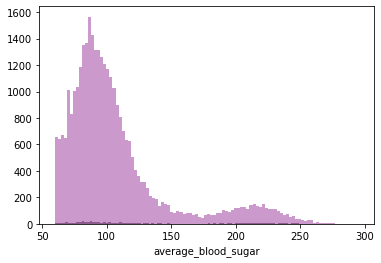

In [66]:
sns.distplot(stk_clean[stk_clean["stroke_in_2018"] == '1']["average_blood_sugar"], 
             kde = False, bins = 100, color = "black")
sns.distplot(stk_clean[stk_clean["stroke_in_2018"] == '0']["average_blood_sugar"], 
             kde = False, bins = 100, color = "purple")

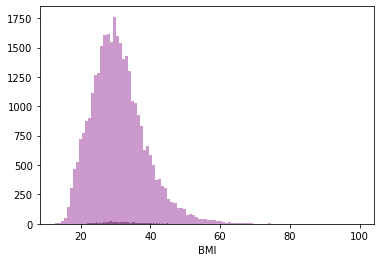

In [67]:
sns.distplot(stk_clean[stk_clean["stroke_in_2018"] == '1']["BMI"], 
             kde = False, bins = 100, color = "black")
sns.distplot(stk_clean[stk_clean["stroke_in_2018"] == '0']["BMI"], 
             kde = False, bins = 100, color = "purple")

### Treatments

Treatments have very few features, and thus we should not include them as part of the feature set is not ideal as it will reduce the sample set too significantly. We will only consider them for question 2. 

In [68]:
print(stk["TreatmentA"].unique())
print(stk["TreatmentB"].unique())
print(stk["TreatmentC"].unique())
print(stk["TreatmentD"].unique())

[nan  0.  1.]
[nan  0.  1.]
[nan  0.  1.]
[nan '0' '1']


In [69]:
print(stk["TreatmentA"].value_counts())
print(stk["TreatmentB"].value_counts())
print(stk["TreatmentC"].value_counts())
print(stk["TreatmentD"].value_counts())

0.0    1182
1.0     258
Name: TreatmentA, dtype: int64
0.0    1033
1.0     407
Name: TreatmentB, dtype: int64
0.0    1158
1.0     282
Name: TreatmentC, dtype: int64
0    1112
1     328
Name: TreatmentD, dtype: int64
